# Problem statement
Understanding defaulter of banking in advance can mitimize huge risk of a bank. Identifying defaulter and not approving their credit at the same time approving credit for the good customer will help bank to minimise risk and get good customer satisfaction. Given huge data for bank customers a predictive model should be build

# Import libraries and File

In [9]:
#Import lobraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import re
from sklearn.cross_validation import train_test_split  
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import confusion_matrix,roc_curve, auc, log_loss 
from sklearn.utils import resample 
from sklearn.grid_search import GridSearchCV 
from sklearn.cross_validation import KFold 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

C:\Users\ba4205\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ba4205\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [10]:
# Import dataset
#dataset=pd.read_csv("BB_Sample2_excel.csv")
#dataset=pd.read_excel("BB_Sample2_excel.xlsx")
dataset=pd.read_table("datanew.txt",sep="\t")

# Basic statistics of Data
238 int n float
8 object
so these objects has to be changed correctly

In [93]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128557 entries, 0 to 128556
Columns: 246 entries, LE_UNIT_MASTER to MAN_LE_MAX_ODD_5000_LOAN_MOR_11
dtypes: float64(236), int64(2), object(8)
memory usage: 241.3+ MB
None


In [94]:
dataset.sample(5)

,LE_UNIT_MASTER,RUN_TS,SAMPLE_CODE,MI_LE_SCOREDATA_LOAN_ACC_EXPOSUR,MI_LE_SCOREDATA_TRANS_ACC_EXPOSU,MI_LE_SCOREDATA_NONFEBOS_EXPOSUR,MI_LE_SCOREDATA_NONFEBOS_NORDANI,R_NEW_B_TYPE,scoredata_available,flag_for_df,...,MAN_LE_MAX_ODD_500_LOAN_MOR_2,MAN_LE_MAX_ODD_5000_LOAN_MOR_3,MAN_LE_MAX_ODD_1000_LOAN_MOR_2,MAN_LE_MAX_ODD_5000_LOAN_MOR_2,MAN_LE_MAX_ODD_500_LOAN_MOR_1,MAN_LE_MAX_ODD_1000_LOAN_MOR_1,MAN_LE_MAX_ODD_2500_LOAN_MOR_1,MAN_LE_MAX_ODD_5000_LOAN_MOR_1,MAN_LE_MAX_ODD_5000_LOAN_MOR_12,MAN_LE_MAX_ODD_5000_LOAN_MOR_11
7468,32883613,2012-02-04 22:39:43.0992030,Development Sample,NaN,-300000.0,NaN,NaN,B_SC_1,trans_acc,Mix,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30132,9001818489,2013-10-06 20:02:07.1109610,Development Sample,-654681.23,-602980.0,-123180.2,-76609.47,B_SC_7,mix,DF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74972,9019009561,2013-10-06 20:02:07.1109610,Development Sample,NaN,NaN,NaN,NaN,B_SC_RD_SME,RD,Mix,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86362,9024792835,2014-08-03 06:27:41.3129990,Development Sample,NaN,NaN,NaN,-430532.54,B_SC_13,Nordania,DF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23606,9021607107,2013-12-07 19:20:22.4159350,Development Sample,NaN,NaN,NaN,-93172.85,B_SC_13,Nordania,DF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
dataset.describe()

,LE_UNIT_MASTER,MI_LE_SCOREDATA_LOAN_ACC_EXPOSUR,MI_LE_SCOREDATA_TRANS_ACC_EXPOSU,MI_LE_SCOREDATA_NONFEBOS_EXPOSUR,MI_LE_SCOREDATA_NONFEBOS_NORDANI,default_total,MAN_LE_REMINDER_FEBOS_SEVERITY_1,MAN_LE_REMINDER_ALL_ACC_SEVERITY,MAN_LE_REMINDER_FEBOS_SEVERITY_2,MAN_IND_GROUP_MEMB_SCOREDATA_ALL,...,MAN_LE_MAX_ODD_500_LOAN_MOR_2,MAN_LE_MAX_ODD_5000_LOAN_MOR_3,MAN_LE_MAX_ODD_1000_LOAN_MOR_2,MAN_LE_MAX_ODD_5000_LOAN_MOR_2,MAN_LE_MAX_ODD_500_LOAN_MOR_1,MAN_LE_MAX_ODD_1000_LOAN_MOR_1,MAN_LE_MAX_ODD_2500_LOAN_MOR_1,MAN_LE_MAX_ODD_5000_LOAN_MOR_1,MAN_LE_MAX_ODD_5000_LOAN_MOR_12,MAN_LE_MAX_ODD_5000_LOAN_MOR_11
count,1.285570e+05,1.848400e+04,9.869900e+04,2.957700e+04,3.196200e+04,128557.000000,7214.000000,2993.000000,2081.000000,4.983900e+04,...,1437.000000,1157.000000,1420.000000,1120.000000,863.000000,844.000000,775.000000,635.000000,953.000000,946.000000
mean,5.716518e+09,-8.654406e+05,-1.476335e+06,-4.217544e+06,-3.148100e+05,0.015783,2.139451,1.545941,1.492552,4.710152e+05,...,10.675017,9.963699,10.433099,10.788393,9.850521,9.312796,9.556129,10.143307,12.651626,11.626850
std,4.333922e+09,3.240112e+06,3.347964e+08,5.819956e+07,6.292908e+05,0.124635,1.708710,1.164299,1.063859,4.102537e+06,...,23.130296,21.380036,20.379152,21.376677,23.009070,17.063048,17.479826,18.506711,36.493817,33.236419
min,1.000171e+07,-3.879217e+08,-1.051320e+11,-3.474256e+09,-2.799764e+07,0.000000,1.000000,1.000000,1.000000,1.000000e-02,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.146817e+07,-1.072990e+06,-3.000000e+05,-8.000000e+05,-3.042391e+05,0.000000,1.000000,1.000000,1.000000,1.704364e+04,...,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
50%,9.005287e+09,-4.327271e+05,-6.267000e+04,-3.030000e+05,-1.041002e+05,0.000000,2.000000,1.000000,1.000000,7.124786e+04,...,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,2.000000,2.000000
75%,9.017863e+09,-1.587896e+05,0.000000e+00,-1.421142e+05,-2.721632e+04,0.000000,3.000000,2.000000,2.000000,2.811775e+05,...,11.000000,10.000000,11.000000,11.000000,6.000000,6.000000,7.000000,8.000000,9.000000,10.000000
max,9.650000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,20.000000,14.000000,14.000000,5.861454e+08,...,429.000000,305.000000,315.000000,315.000000,457.000000,222.000000,222.000000,222.000000,533.000000,579.000000


In [96]:
dataset.describe(include=['O'])


,RUN_TS,SAMPLE_CODE,R_NEW_B_TYPE,scoredata_available,flag_for_df,MI_KNID_COUNTRY_OF_REGISTRATION,MAN_LE_LPS_BEH,MAN_LE_LPS_FAS
count,128557,128557,128557,128557,128557,128178,128557,128557
unique,36,1,6,7,2,6,4,3
top,2014-04-06 05:09:04.4659670,Development Sample,B_SC_1,mix,Mix,DK,No BEH Event,No FAS Event
freq,4116,128557,47332,72356,96601,58975,120780,121860


# Reducing size of data/ Preprocessing
Sometimes there are more than 1 row for one customer id we can take latest one. For one customer lets arrange first record as default and then sort with timestamp

In [11]:
clean=dataset.sort_values(['LE_UNIT_MASTER','default_total','RUN_TS'],ascending=[True,False,False])
#print(dataset.loc[dataset['LE_UNIT_MASTER']==10001706])
#clean=clean.reset_index(drop=True)
clean=clean.drop_duplicates(subset="LE_UNIT_MASTER",keep="first")
#print(clean.loc[dataset['LE_UNIT_MASTER']==10001706])
print('new shape of data',clean.shape)

new shape of data (69228, 246)


So new data is reduced to almost half
Default and non default in original and clean dataset are almost equal as once customer is default his old records are neglected but still 44 default data are neglected. Could be some are duplicate default for one customer 2 default records. Its ok to reject those 

In [12]:
print('original dataset default count \n',dataset['default_total'].value_counts())
print('clean dataset default count \n',clean['default_total'].value_counts())

original dataset default count 
 0    126528
1      2029
Name: default_total, dtype: int64
clean dataset default count 
 0    67241
1     1987
Name: default_total, dtype: int64


bacause of , in file numerical variables are considered as object so convert , to .
Its difficult to change in pandas so its changed in data.txt file

In [13]:
#clean.loc[clean['LE_UNIT_MASTER']==9009314854]
#clean['MI_LE_SCOREDATA_TRANS_ACC_EXPOSU']=clean['MI_LE_SCOREDATA_TRANS_ACC_EXPOSU'].replace(r',','.').astype('float')
#clean.loc[clean['LE_UNIT_MASTER']==9009314854]
# check all the columns with type=O
#clean.describe(include=['O'])


Label encoding for object type variables
Drop 2 variables 

In [14]:
clean=clean.drop('RUN_TS',axis=1)
clean=clean.drop('SAMPLE_CODE',axis=1)

In [15]:
clean['R_NEW_B_TYPE'].value_counts()
def change(code):
    if code=='B_SC_1':
        return 1
    elif code=='B_SC_13':
        return 2
    elif code=='B_SC_7':
        return 3
    elif code=='B_SC_RD_SME':
        return 4
    elif code=='B_SC_5':
        return 5
    else :
        return 6
    
clean['R_NEW_B_TYPE'] =clean['R_NEW_B_TYPE'].apply(change)
clean['R_NEW_B_TYPE'].value_counts()    

1    24630
2    16535
3    15446
4     5608
5     3562
6     3447
Name: R_NEW_B_TYPE, dtype: int64

In [16]:
print(clean['scoredata_available'].value_counts())
def change(code):
    if code=='mix':
        return 1
    elif code=='trans_acc':
        return 2
    elif code=='Nordania':
        return 3
    elif code=='RD':
        return 4
    elif code=='non-febos':
        return 5
    elif code=='cards':
        return 6
    else :
        return 7
    
clean['scoredata_available'] =clean['scoredata_available'].apply(change)
print(clean['scoredata_available'].value_counts())



mix          37296
trans_acc    17075
Nordania      9712
RD            3442
non-febos     1120
cards          305
loan_acc       278
Name: scoredata_available, dtype: int64
1    37296
2    17075
3     9712
4     3442
5     1120
6      305
7      278
Name: scoredata_available, dtype: int64


In [17]:
print(clean['flag_for_df'].value_counts())
def change(code):
    if code=='Mix':
        return 1
    else :
        return 2
    
clean['flag_for_df'] =clean['flag_for_df'].apply(change)
print(clean['flag_for_df'].value_counts())


Mix    49154
DF     20074
Name: flag_for_df, dtype: int64
1    49154
2    20074
Name: flag_for_df, dtype: int64


In [18]:
print(clean['MI_KNID_COUNTRY_OF_REGISTRATION'].value_counts())
def change(code):
    if code=='DK':
        return 1
    elif code=='FI':
        return 2
    elif code=='SE':
        return 3
    elif code=='GB':
        return 4
    elif code=='NO':
        return 5
    else :
        return 6
    
clean['MI_KNID_COUNTRY_OF_REGISTRATION'] =clean['MI_KNID_COUNTRY_OF_REGISTRATION'].apply(change)
print(clean['MI_KNID_COUNTRY_OF_REGISTRATION'].value_counts())



DK    30341
FI    16332
SE    15328
GB     3424
NO     3415
IE        9
Name: MI_KNID_COUNTRY_OF_REGISTRATION, dtype: int64
1    30341
2    16332
3    15328
4     3424
5     3415
6      388
Name: MI_KNID_COUNTRY_OF_REGISTRATION, dtype: int64


In [19]:
print(clean['MAN_LE_LPS_BEH'].value_counts())
def change(code):
    if code=='No BEH Event':
        return 1
    elif code=='Non-severe':
        return 2
    elif code=='OEI':
        return 3
    else :
        return 4
    
clean['MAN_LE_LPS_BEH'] =clean['MAN_LE_LPS_BEH'].apply(change)
print(clean['MAN_LE_LPS_BEH'].value_counts())


No BEH Event    64681
Non-severe       3691
OEI               490
Severe            366
Name: MAN_LE_LPS_BEH, dtype: int64
1    64681
2     3691
3      490
4      366
Name: MAN_LE_LPS_BEH, dtype: int64


In [20]:
print(clean['MAN_LE_LPS_FAS'].value_counts())

      
def change(code):
    if code=='No FAS Event':
        return 1
    elif code=='FAS Non-OEI Event':
        return 2
    else :
        return 3
    
clean['MAN_LE_LPS_FAS'] =clean['MAN_LE_LPS_FAS'].apply(change)
print(clean['MAN_LE_LPS_FAS'].value_counts())


No FAS Event         65395
FAS Non-OEI Event     2817
FAS OEI Event         1016
Name: MAN_LE_LPS_FAS, dtype: int64
1    65395
2     2817
3     1016
Name: MAN_LE_LPS_FAS, dtype: int64


In [21]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69228 entries, 110925 to 104125
Columns: 244 entries, LE_UNIT_MASTER to MAN_LE_MAX_ODD_5000_LOAN_MOR_11
dtypes: float64(236), int64(8)
memory usage: 129.4 MB


So now all columns are integer of catagorigal. Its time to impute some value for NaN
Check for missing values.
When any column has more than 60% NaN values we can drop those

For catagorical NaN values replace with median and for numeric with mean

Remove outliners with .95 quartile 

Do normalization of numeric variables

In [22]:
l=clean.columns

j=0
for i in l:
    if (clean[i].isnull().sum()/clean.shape[0] > .6):
        j+=1
        #print("this column has high NaN values",i,clean[i].isnull().sum())
        clean=clean.drop(i,axis=1)
        
print('New shape after dropping',j,clean.shape)        

New shape after dropping 116 (69228, 128)


col with catagorigal value filled with median MAN_LE_REMINDER_SEVERITY_1_COUNT
col with catagorigal value filled with median MAN_LE_REMINDER_SEVERITY_2_COUNT
col with catagorigal value filled with median MAN_LE_REMINDER_SEVERITY_3_COUNT
col with catagorigal value filled with median MAN_LE_MAX_REMINDER_SEVERITY_MTH
col with catagorigal value filled with median MAN_CP_CONFIDENTIAL_FLAG
col with catagorigal value filled with median MAN_CP_NUMBER_OF_AUDITO
col with catagorigal value filled with median MAN_FAS_Positive_EBITDA_EBIT_EBT
col with catagorigal value filled with median MAN_FAS_Positive_FCF_1_2_3
Index(['LE_UNIT_MASTER', 'MI_LE_SCOREDATA_TRANS_ACC_EXPOSU', 'R_NEW_B_TYPE',
       'scoredata_available', 'flag_for_df', 'default_total',
       'MAN_LE_REMINDER_SEVERITY_1_COUNT', 'MAN_LE_REMINDER_SEVERITY_2_COUNT',
       'MAN_LE_REMINDER_SEVERITY_3_COUNT', 'MI_KNID_COUNTRY_OF_REGISTRATION',
       ...
       'MI_KNID_FAS_RAT_CURRENT_VALUE_1', 'MAN_LE_LPS_FAS',
       'MI_KNID_FAS_CSH_

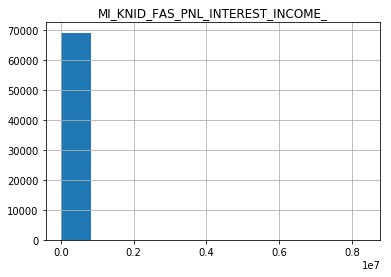

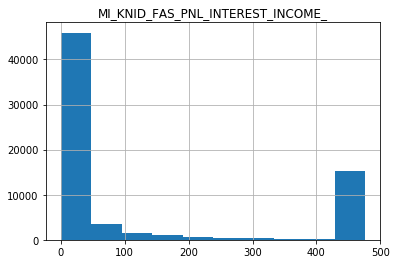

In [23]:
#inpute mean value in NaN
#But we have to be careful here for catagorycal we have to impute most common and for numeric mean

l=clean.columns

j=0
for i in l:
    if (clean[i].isnull().sum()>0):
        j+=1
        #If there are less than 15 values then we can consider it as catagorical
        
        if (clean[i].value_counts().shape[0]<15):#catagorigal variable
            clean[i].fillna(clean[i].median(),inplace=True)
            print('col with catagorigal value filled with median',i)
        else:    #numeric variables
           #print("this column has high NaN values ",i,clean[i].isnull().sum())
           clean[i].fillna(clean[i].mean(),inplace=True)
        #print("this column has high NaN values",i,clean[i].isnull().sum())
         
        
        
#handle outliner change >5sigma to max value and <5sigma to min value for numeric data
clean.hist(column="MI_KNID_FAS_PNL_INTEREST_INCOME_",bins=10)


#beow not working for replacing outliner****
#down_quantiles = clean.quantile(0.05)
#up_quantiles = clean.quantile(0.95)
#outliers_low = (clean < down_quantiles)
#clean.mask(outliers_low, down_quantiles, axis=1)  
#outliers_low = (clean > up_quantiles)
#clean=clean.mask(outliers_low, up_quantiles, axis=1)  

l=clean.columns

j=0
for i in l:
        j+=1
        #If there are less than 15 values then we can consider it as catagorical
        
        if (clean[i].value_counts().shape[0]>15):#numeric
             down_quantiles = clean[i].quantile(0.05)
             up_quantiles = clean[i].quantile(0.95)
             outliers_low = (clean[i] < down_quantiles)
             clean[i]= clean[i].mask(outliers_low, down_quantiles)  
             outliers_low1 = (clean[i] > up_quantiles)
             clean[i]=clean[i].mask(outliers_low1, up_quantiles)
 
            
      
#clean['LE_UNIT_MASTER']=clean['LE_UNIT_MASTER'].apply(lambda x: (x-x.min())/(x.max()-x.min()))
#test for Nan
j=0
for i in l:
    if (clean[i].isnull().sum()>0):
        j+=1
        print("this column has high NaN values",i,clean[i].isnull().sum())

        
        
columns=clean.columns.values.tolist()
print(clean.columns)
#normalize whole data but visualizing is not good with it maybe only for numerical normalizing is required
#xx=clean.values
#min_max_scaler=preprocessing.MinMaxScaler()
#xx_scaled=min_max_scaler.fit_transform(xx)
#clean=pd.DataFrame(xx_scaled)
#print(clean.shape)
#clean.columns=columns


#try normalize only numeric columns
j=0
for i in l:
        if (clean[i].value_counts().shape[0]>15):#numeric variable
          clean[i] = (clean[i] - clean[i].mean()) / (clean[i].max() - clean[i].min())


#print(clean.head(5))
#print(clean['MI_KNID_FAS_PNL_INTEREST_INCOME_'].describe())
print(clean.shape)
#print(clean.columns)
#j=0
#for i in l:
#        if (clean[i].value_counts().shape[0]>15):#numeric variable
#            print("this column has high NaN values ",i,clean[i].isnull().sum())
            #clean[i].apply(normalize,axis=1)
           #clean[i].fillna(clean[i].mean(),inplace=True)
            #clean[i]=min_max_scaler.fit_transform(clean[i])
        #print("this column has high NaN values",i,clean[i].isnull().sum())


In [24]:
clean_x=clean.drop("default_total",axis=1)
clean_y=clean["default_total"]
model=LogisticRegression()
#rfe=RFE(model,10)
#rfe=rfe.fit(clean_x,clean_y)
#print(rfe.support_)
#print(rfe.ranking_)

In [545]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
#increase sample size to get important variables correctly
#clean_x,clean_y=make_classification(n_samples=60000,n_features=128,n_classes=2,random_state=0)
#forest=ExtraTreesClassifier(n_estimators=200,random_state=0)
#forest.fit(clean_x,clean_y)
#importance=forest.feature_importances_
#indices=np.argsort(importance)[::-1]
#for f in range(clean_x.shape[1]):
    #print("%d. feature %d (%f))"%(f+1,indices[f],importance[indices[f]]))
    

#The above selection is not working so try different one
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
model = ExtraTreesClassifier()
model.fit(clean_x.values, clean_y.values)
print(model.feature_importances_)
print(type(model.feature_importances_))

print((-model.feature_importances_).argsort()[:128])


[0.01964296 0.01072092 0.00862844 0.00782092 0.00516822 0.00476562
 0.00601973 0.00285235 0.00721783 0.01507951 0.01191406 0.01433991
 0.00779912 0.01152626 0.01774817 0.00912919 0.00324366 0.01618323
 0.00727302 0.00920624 0.00869692 0.00929802 0.00755268 0.00871584
 0.00797023 0.01942916 0.00918645 0.00822024 0.00765614 0.00828888
 0.01030783 0.01394005 0.00905006 0.0090997  0.00859379 0.00986829
 0.01139676 0.00955491 0.02268081 0.01023811 0.00631769 0.00861109
 0.00587184 0.00756362 0.00670021 0.0056526  0.00639509 0.00788393
 0.00735869 0.00740198 0.00523278 0.00663034 0.00640925 0.00798855
 0.00556636 0.00837734 0.00750002 0.00922997 0.00654047 0.00847453
 0.00836848 0.00794938 0.0072717  0.00702328 0.00636526 0.00257545
 0.00538786 0.0052072  0.00815413 0.00831322 0.00787367 0.00729146
 0.0087519  0.0070151  0.00773539 0.00611015 0.0071969  0.00670547
 0.00700723 0.00707776 0.00383037 0.0079823  0.00469544 0.00818198
 0.007265   0.00636677 0.00520402 0.00663985 0.00740466 0.0077


So lets check the corelations of top 20 features from above and we will try to make model using those i.e. 
38,25,14,17,9,118,37,31,10,35,13,20,15,11,33,30,1,32,34,36
#0,78,122,113,10,67,102,125,65,95,37,45,89,127,40,83,18,22,39,79
#81,98,96,99,100,125,19,63,75,123,37,84,77,40,43,115,94,24,8,11

In [576]:
#above is giving columns excluding output
clean_x=clean.drop('default_total',axis=1)
colnames=clean_x.columns.tolist()
#If we check corelation of 81th feature with default_total it looks good so maybe its most important
#l=[81,98,96,99,100,125,19,63,75,123,37,84,77,40,43,115,94,24,8,11]
#l=[0,78,122,113,10,67,102,125,65,95,37,45,89,127,40,83,18,22,39,79]
l=[38,25,14,17,9,118,37,31,10,35,13,20,15,11,33,30,1,32,34,36]
for a in l:
  print(colnames[a])
  #print(clean.corr().loc['MAN_FAS_Positive_EBITDA_EBIT_EBT','default_total'])
  print(clean.corr().loc[colnames[a],'default_total'])



MAN_LE_LPS_BEH
0.18764565143392192
MAN_LE_CUSTINFRA_CUSTOMER_TIME_E
-0.047579482637576484
MAN_LE_SCOREDATA_TRANS_ACC_OD_DA
0.15535274807617075
MAN_LE_CUSTINFRA_INDUSTRY_CODE_E
-0.0229988726027826
MAN_LE_COMBINED_REMINDER_1_12
0.1400310920747198
MAN_LE_LPS_FAS
0.1671274463576227
MAN_LE_TREND_ODD_2500_TOTAL_0_4v
0.03695480212816416
MAN_LE_SCOREDATA_ALL_EXPOSURE_SU
0.02089696435990736
MAN_LE_MAX_REMINDER_SEVERITY_MTH
0.159813250493634
MAN_LE_TREND_ODD_500_TOTAL_0_4vs
0.07200859007775327
MAN_LE_SCOREDATA_TRANS_ACC_BALAN
-0.05176196156460323
MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T
-0.021004247940494956
MAN_LE_SCOREDATA_RT_AVG_DISP_DEP
0.025021190281817693
MAN_LE_SCOREDATA_TRANS_CARDS_UTI
0.041900024009423976
MAN_CP_CONFIDENTIAL_FLAG
-0.018291827001504987
MAN_LE_SCOREDATA_CTO_TOTAL_TR_1T
-0.03893145588630153
MI_LE_SCOREDATA_TRANS_ACC_EXPOSU
0.012231858515321365
MAN_LE_SCOREDATA_TRANS_ACC_NO_CR
-0.01900407121067206
MAN_CP_NUMBER_OF_AUDITO
0.006176951567936729
MAN_LE_TREND_ODD_1000_TOTAL_0_4v
0.07227

# Visualization
For all variables lets see the boxplot

this is numerical
count    6.922800e+04
mean     7.304841e-14
std      4.764791e-01
min     -6.443997e-01
25%     -6.427202e-01
50%      3.535744e-01
75%      3.549584e-01
max      3.556003e-01
Name: LE_UNIT_MASTER, dtype: float64


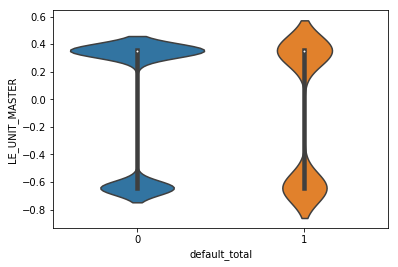

this is numerical
count    6.922800e+04
mean    -1.327939e-13
std      4.311892e-01
min     -6.548385e-01
25%     -6.548385e-01
50%      2.658946e-01
75%      3.451615e-01
max      3.451615e-01
Name: MI_LE_SCOREDATA_TRANS_ACC_EXPOSU, dtype: float64


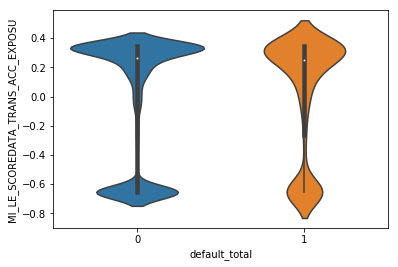

this is catagorigal
1    24630
2    16535
3    15446
4     5608
5     3562
6     3447
Name: R_NEW_B_TYPE, dtype: int64


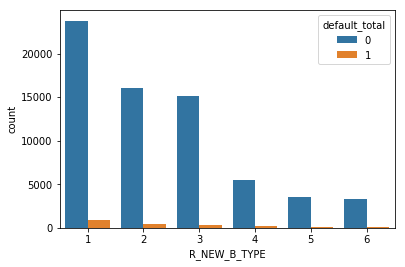

this is catagorigal
1    37296
2    17075
3     9712
4     3442
5     1120
6      305
7      278
Name: scoredata_available, dtype: int64


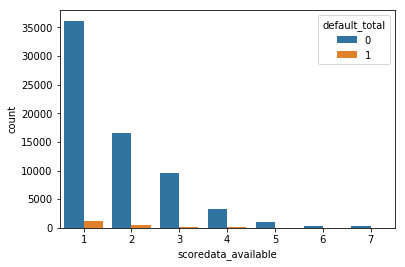

this is catagorigal
1    49154
2    20074
Name: flag_for_df, dtype: int64


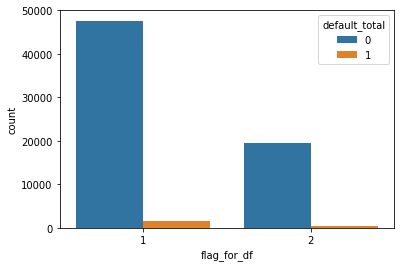

this is catagorigal
0.0    68147
1.0      999
2.0       73
3.0        7
5.0        1
4.0        1
Name: MAN_LE_REMINDER_SEVERITY_1_COUNT, dtype: int64


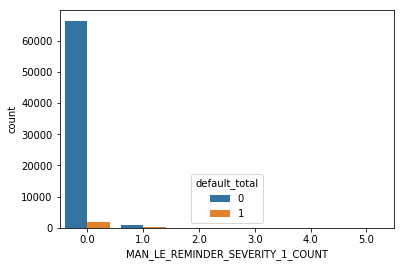

this is catagorigal
0.0    68879
1.0      335
2.0       13
3.0        1
Name: MAN_LE_REMINDER_SEVERITY_2_COUNT, dtype: int64


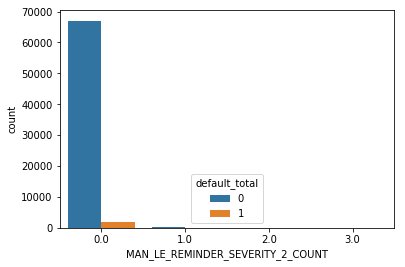

this is catagorigal
0.0    69035
1.0      181
2.0       10
3.0        1
4.0        1
Name: MAN_LE_REMINDER_SEVERITY_3_COUNT, dtype: int64


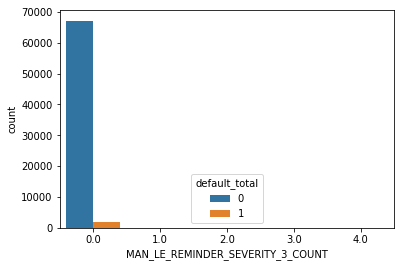

this is catagorigal
1    30341
2    16332
3    15328
4     3424
5     3415
6      388
Name: MI_KNID_COUNTRY_OF_REGISTRATION, dtype: int64


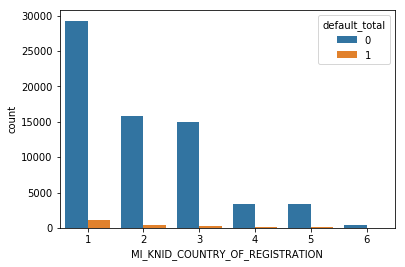

this is numerical
count    6.922800e+04
mean    -4.407483e-14
std      2.608979e-01
min     -1.623315e-01
25%     -1.623315e-01
50%     -1.623315e-01
75%      1.935440e-01
max      8.376685e-01
Name: MAN_LE_COMBINED_REMINDER_1_12, dtype: float64


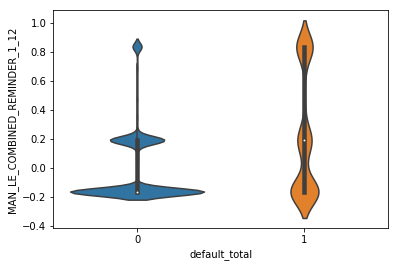

this is catagorigal
0.0    67864
1.0      864
2.0      307
3.0      193
Name: MAN_LE_MAX_REMINDER_SEVERITY_MTH, dtype: int64


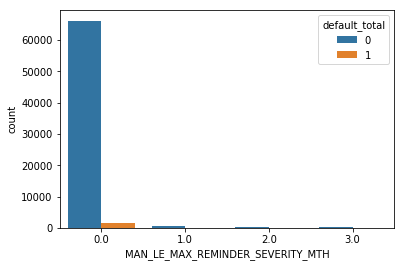

this is numerical
count    6.922800e+04
mean    -2.158695e-13
std      4.589552e-01
min     -4.367054e-01
25%     -4.367054e-01
50%     -4.367054e-01
75%      5.102207e-01
max      5.632946e-01
Name: MAN_LE_SCOREDATA_TRANS_CARDS_UTI, dtype: float64


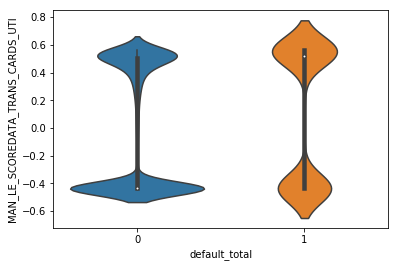

this is numerical
count    6.922800e+04
mean     9.972683e-14
std      2.603192e-01
min     -2.851515e-01
25%     -2.507592e-01
50%      5.368262e-02
75%      1.307906e-01
max      7.148485e-01
Name: MAN_LE_SCOREDATA_ALL_ACC_DISP_DE, dtype: float64


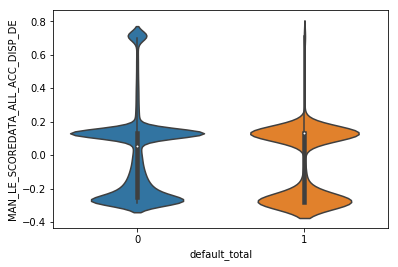

this is numerical
count    6.922800e+04
mean    -1.623900e-13
std      4.040786e-01
min     -4.186921e-01
25%     -3.101580e-01
50%     -2.470069e-01
75%      5.813079e-01
max      5.813079e-01
Name: MAN_LE_SCOREDATA_TRANS_ACC_BALAN, dtype: float64


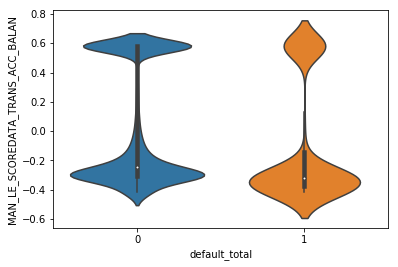

this is numerical
count    6.922800e+04
mean     2.938872e-14
std      2.465009e-01
min     -1.530901e-01
25%     -1.530901e-01
50%     -1.530901e-01
75%      8.177583e-02
max      8.469099e-01
Name: MAN_LE_SCOREDATA_TRANS_ACC_OD_DA, dtype: float64


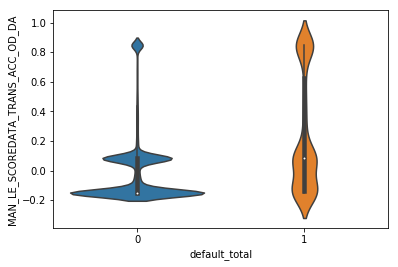

this is numerical
count    6.922800e+04
mean     2.157726e-13
std      4.700399e-01
min     -3.587344e-01
25%     -3.570484e-01
50%     -3.486916e-01
75%      6.412656e-01
max      6.412656e-01
Name: MAN_LE_SCOREDATA_RT_AVG_DISP_DEP, dtype: float64


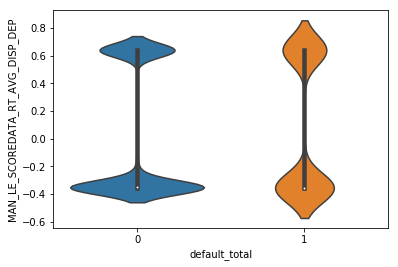

this is numerical
count    6.922800e+04
mean     2.181114e-13
std      4.964888e-01
min     -5.591813e-01
25%     -5.591813e-01
50%      4.408187e-01
75%      4.408187e-01
max      4.408187e-01
Name: MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P, dtype: float64


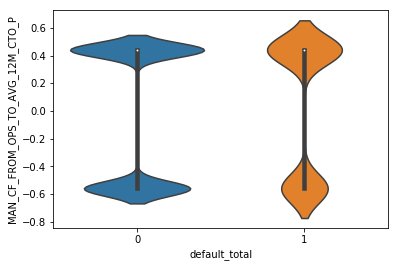

this is numerical
count    6.922800e+04
mean    -4.838334e-14
std      2.553939e-01
min     -5.225352e-01
25%     -1.603399e-01
50%     -6.117908e-03
75%      1.578964e-01
max      4.774648e-01
Name: MAN_LE_CUSTINFRA_INDUSTRY_CODE_E, dtype: float64


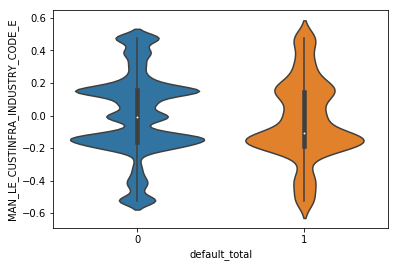

this is numerical
count    6.922800e+04
mean    -2.681914e-14
std      3.153744e-01
min     -3.220962e-01
25%     -2.958937e-01
50%     -1.430898e-01
75%      3.133814e-01
max      6.779038e-01
Name: MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4, dtype: float64


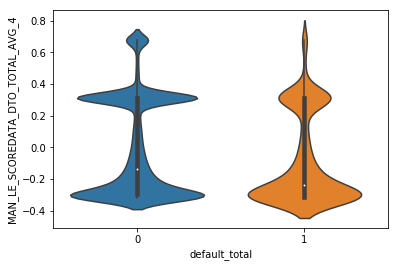

this is numerical
count    6.922800e+04
mean     5.405824e-14
std      2.805711e-01
min     -2.928322e-01
25%     -2.668285e-01
50%     -7.566101e-02
75%      2.016399e-01
max      7.071678e-01
Name: MAN_LE_SCOREDATA_DTO_TOTAL_AVG_1, dtype: float64


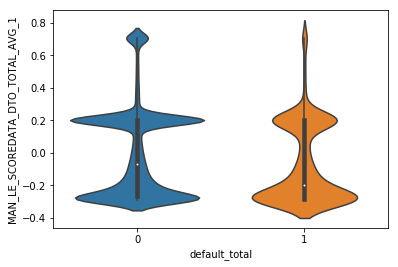

this is numerical
count    6.922800e+04
mean     3.084521e-14
std      4.437380e-01
min     -3.910188e-01
25%     -3.350544e-01
50%     -3.040431e-01
75%      6.089812e-01
max      6.089812e-01
Name: MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T, dtype: float64


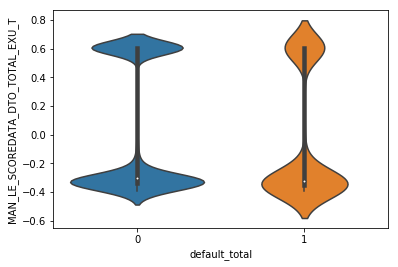

this is numerical
count    6.922800e+04
mean     9.854894e-15
std      2.648813e-01
min     -3.491369e-01
25%     -1.991865e-01
50%      1.874420e-02
75%      3.889589e-02
max      6.508631e-01
Name: MAN_LE_SCOREDATA_RISK_ACC_OLDEST, dtype: float64


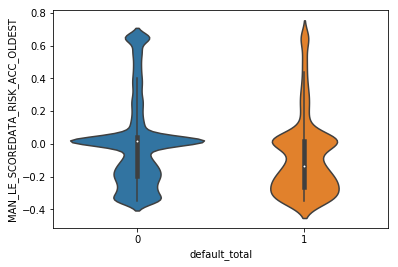

this is numerical
count    6.922800e+04
mean     9.900665e-14
std      2.761052e-01
min     -2.838095e-01
25%     -2.604308e-01
50%     -7.121185e-02
75%      1.890544e-01
max      7.161905e-01
Name: MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1, dtype: float64


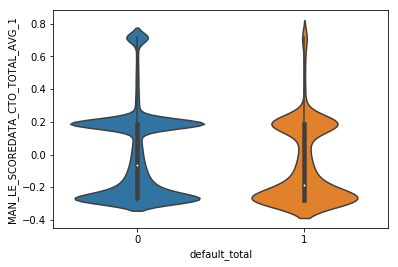

this is numerical
count    6.922800e+04
mean     1.238095e-13
std      2.951396e-01
min     -2.994935e-01
25%     -2.741089e-01
50%     -1.234288e-01
75%      2.594477e-01
max      7.005065e-01
Name: MAN_LE_SCOREDATA_CTO_TOTAL_AVG_4, dtype: float64


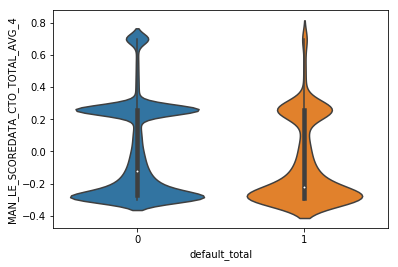

this is numerical
count    6.922800e+04
mean     1.257650e-14
std      2.740074e-01
min     -2.754470e-01
25%     -2.526798e-01
50%     -8.412663e-02
75%      1.856222e-01
max      7.245530e-01
Name: MAN_LE_SCOREDATA_DTO_TOTAL_AVG_E, dtype: float64


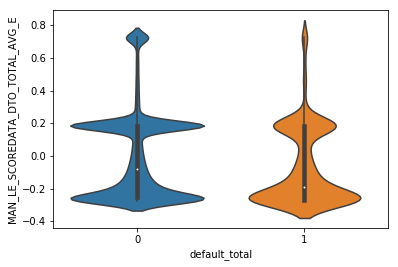

this is numerical
count    6.922800e+04
mean    -5.661384e-15
std      2.871185e-01
min     -3.481500e-01
25%     -2.343398e-01
50%     -7.707668e-02
75%      1.885771e-01
max      6.518500e-01
Name: MAN_LE_CUSTINFRA_CUSTOMER_TIME_E, dtype: float64


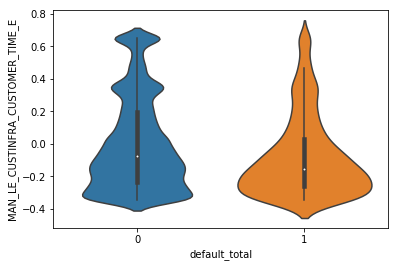

this is numerical
count    6.922800e+04
mean    -1.609903e-13
std      4.140158e-01
min     -3.667472e-01
25%     -2.744845e-01
50%     -2.596359e-01
75%      6.332528e-01
max      6.332528e-01
Name: MAN_LE_SCOREDATA_RT_AVG_DTO_CTO_, dtype: float64


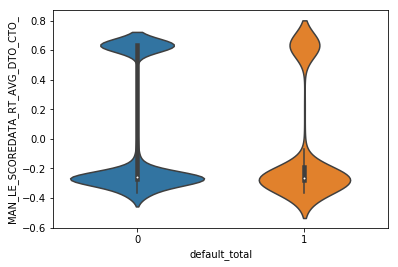

this is numerical
count    6.922800e+04
mean     1.136356e-13
std      2.897982e-01
min     -2.926616e-01
25%     -2.646526e-01
50%     -1.196960e-01
75%      2.462487e-01
max      7.073384e-01
Name: MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8, dtype: float64


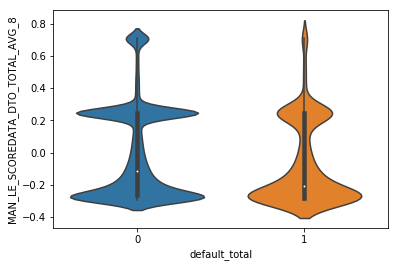

this is numerical
count    6.922800e+04
mean    -1.096148e-13
std      2.805834e-01
min     -2.808009e-01
25%     -2.529144e-01
50%     -1.089400e-01
75%      2.170281e-01
max      7.191991e-01
Name: MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8, dtype: float64


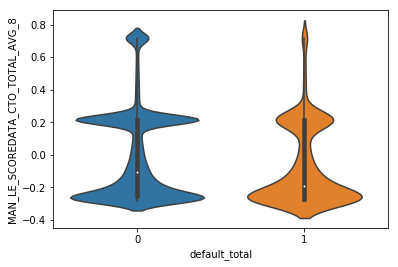

this is numerical
count    6.922800e+04
mean    -7.352827e-14
std      2.727739e-01
min     -2.715185e-01
25%     -2.500637e-01
50%     -8.364368e-02
75%      1.814482e-01
max      7.284815e-01
Name: MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E, dtype: float64


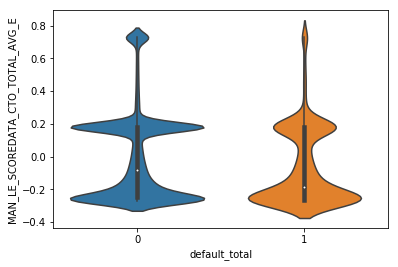

this is numerical
count    6.922800e+04
mean    -1.590635e-13
std      3.703691e-01
min     -5.323244e-01
25%     -2.920643e-01
50%     -1.571620e-01
75%      4.676756e-01
max      4.676756e-01
Name: MAN_LE_SCOREDATA_CTO_TOTAL_TR_1T, dtype: float64


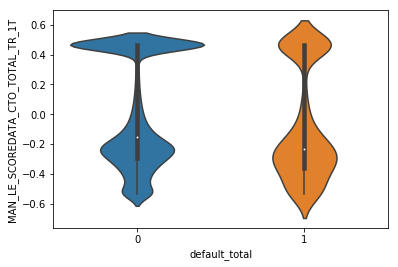

this is numerical
count    6.922800e+04
mean     7.934260e-14
std      4.043565e-01
min     -7.047574e-01
25%     -2.683950e-01
50%      2.432850e-01
75%      2.870129e-01
max      2.952426e-01
Name: MAN_LE_SCOREDATA_ALL_EXPOSURE_SU, dtype: float64


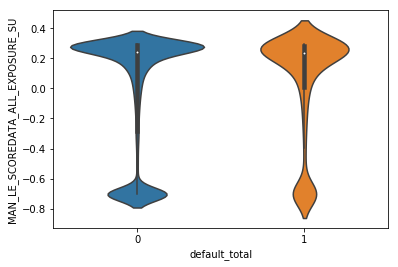

this is numerical
count    6.922800e+04
mean    -2.509580e-15
std      2.657650e-01
min     -2.559855e-01
25%     -2.265738e-01
50%     -7.951493e-02
75%      1.395160e-01
max      7.440145e-01
Name: MAN_LE_SCOREDATA_TRANS_ACC_NO_CR, dtype: float64


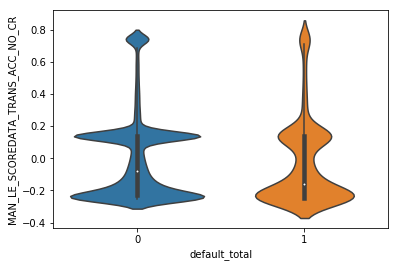

this is catagorigal
1.0    38982
0.0    30246
Name: MAN_CP_CONFIDENTIAL_FLAG, dtype: int64


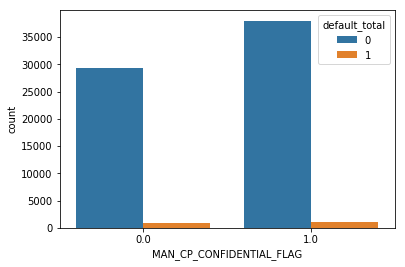

this is catagorigal
0.0    49049
1.0    19886
2.0      288
3.0        5
Name: MAN_CP_NUMBER_OF_AUDITO, dtype: int64


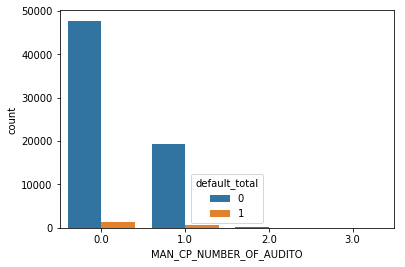

this is numerical
count    6.922800e+04
mean     2.244456e-15
std      1.897979e-01
min     -3.545704e-01
25%     -2.123712e-02
50%     -2.123712e-02
75%     -2.123712e-02
max      6.454296e-01
Name: MAN_LE_TREND_ODD_500_TOTAL_0_4vs, dtype: float64


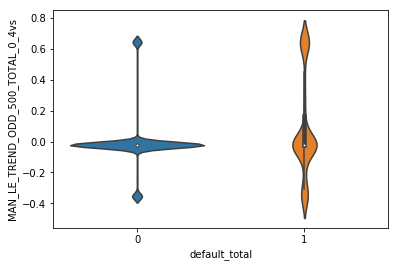

this is numerical
count    6.922800e+04
mean    -5.686446e-16
std      1.844842e-01
min     -3.532147e-01
25%     -1.988133e-02
50%     -1.988133e-02
75%     -1.988133e-02
max      6.467853e-01
Name: MAN_LE_TREND_ODD_1000_TOTAL_0_4v, dtype: float64


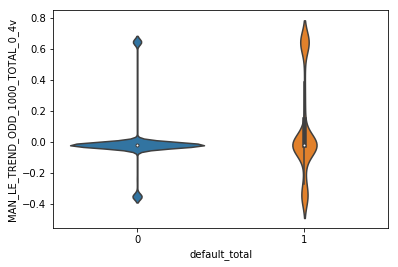

this is numerical
count    6.922800e+04
mean    -1.644230e-16
std      1.662587e-01
min     -4.971791e-01
25%      2.820915e-03
50%      2.820915e-03
75%      2.820915e-03
max      5.028209e-01
Name: MAN_LE_TREND_ODD_2500_TOTAL_0_4v, dtype: float64


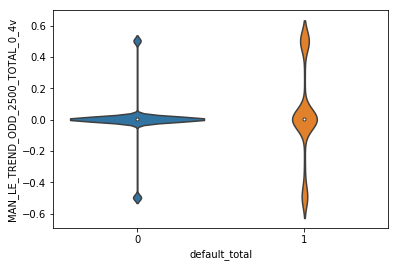

this is catagorigal
1    64681
2     3691
3      490
4      366
Name: MAN_LE_LPS_BEH, dtype: int64


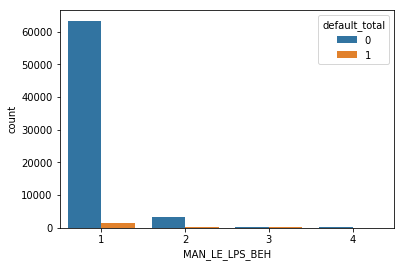

this is numerical
count    6.922800e+04
mean    -6.532665e-14
std      3.078802e-01
min     -4.692570e-01
25%     -1.978478e-01
50%      2.992896e-03
75%      2.335297e-01
max      5.307430e-01
Name: MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT, dtype: float64


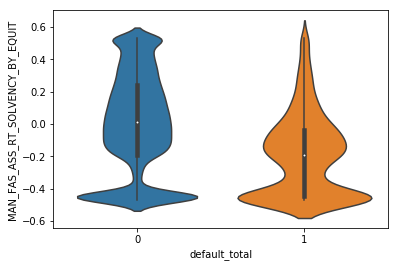

this is numerical
count    6.922800e+04
mean     7.049473e-14
std      3.926565e-01
min     -3.340880e-01
25%     -2.848323e-01
50%     -2.221329e-01
75%      3.422310e-01
max      6.659120e-01
Name: MAN_FAS_GEAR_RT_EQUITY_LIABILITY, dtype: float64


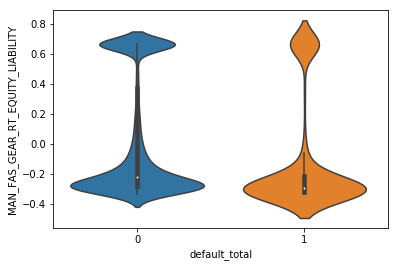

this is numerical
count    6.922800e+04
mean     5.591302e-14
std      3.043776e-01
min     -4.799050e-01
25%     -3.433367e-01
50%      1.491149e-02
75%      2.320889e-01
max      5.200950e-01
Name: MAN_FAS_RAT_SOLVENCY_EXCL_INTANG, dtype: float64


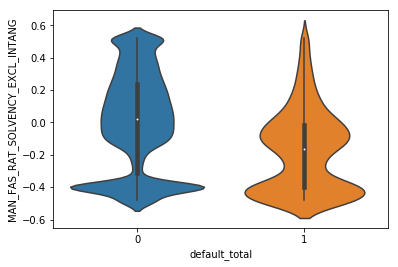

this is numerical
count    6.922800e+04
mean    -9.443626e-14
std      3.498842e-01
min     -3.111425e-01
25%     -2.632865e-01
50%     -2.003991e-01
75%      5.263029e-01
max      6.888575e-01
Name: MAN_FAS_GEAR_RT_EQUITY_CURRENT_L, dtype: float64


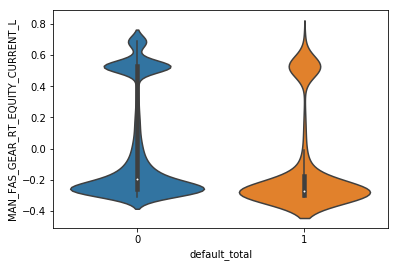

this is numerical
count    6.922800e+04
mean    -6.683383e-14
std      3.860523e-01
min     -2.937836e-01
25%     -2.600808e-01
50%     -2.204208e-01
75%      1.268888e-01
max      7.062164e-01
Name: MI_KNID_FAS_LIA_RESERVES_VALUE_1, dtype: float64


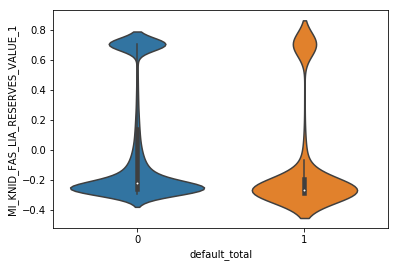

this is numerical
count    6.922800e+04
mean     3.341848e-14
std      3.633744e-01
min     -2.498375e-01
25%     -2.295025e-01
50%     -1.932378e-01
75%      1.669014e-02
max      7.501625e-01
Name: MI_KNID_FAS_LIA_EQT_VALUE_1, dtype: float64


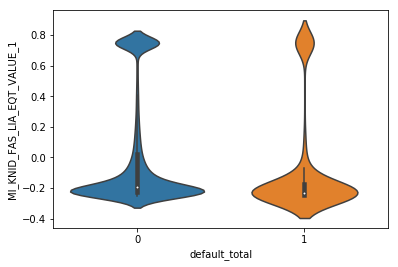

this is numerical
count    6.922800e+04
mean    -6.537824e-16
std      2.198115e-01
min     -4.226903e-01
25%     -1.137275e-01
50%     -3.407088e-02
75%      5.660066e-02
max      5.773097e-01
Name: MAN_FAS_PROF_RT_EBIT_EQUITY_1, dtype: float64


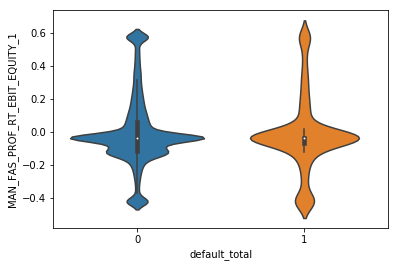

this is numerical
count    6.922800e+04
mean     2.859973e-14
std      2.318918e-01
min     -3.465098e-01
25%     -1.644799e-01
50%      1.680865e-02
75%      2.574845e-02
max      6.534902e-01
Name: MAN_FAS_PROF_RT_EBITDA_EQUITY_1, dtype: float64


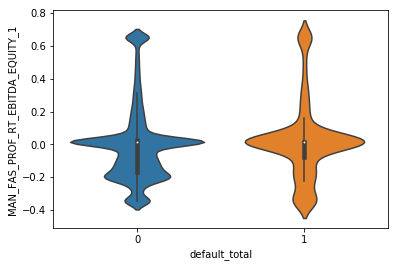

this is numerical
count    6.922800e+04
mean    -3.306186e-14
std      2.498120e-01
min     -4.257859e-01
25%     -1.825363e-01
50%     -5.840926e-02
75%      2.260050e-01
max      5.742141e-01
Name: MAN_FAS_SOLVENCY_RATIO, dtype: float64


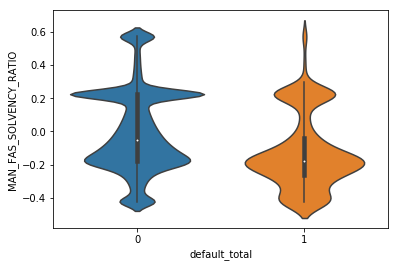

this is numerical
count    6.922800e+04
mean     1.665864e-14
std      2.483292e-01
min     -3.172236e-01
25%     -1.931262e-01
50%     -1.053136e-01
75%      1.730382e-01
max      6.827764e-01
Name: MAN_FAS_DEBT_RT_EBT_INTEREST_EXP, dtype: float64


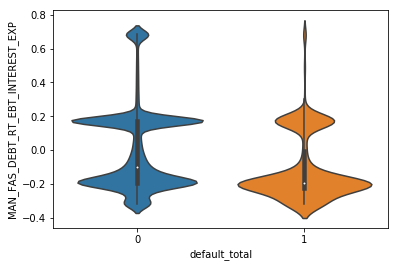

this is numerical
count    6.922800e+04
mean    -3.455545e-14
std      2.444102e-01
min     -4.439294e-01
25%     -1.557112e-01
50%     -6.177828e-02
75%      2.208826e-01
max      5.560706e-01
Name: MAN_FAS_DEBT_RT_EBT_LIABILITY_1, dtype: float64


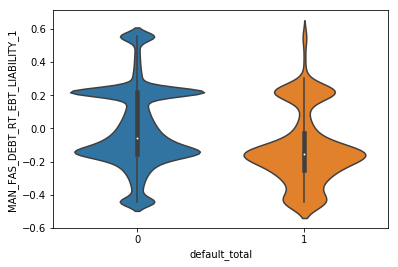

this is numerical
count    6.922800e+04
mean    -1.852609e-14
std      3.619178e-01
min     -2.114274e-01
25%     -2.092500e-01
50%     -1.888398e-01
75%     -4.510364e-02
max      7.885726e-01
Name: MAN_FAS_RAT_CASH_AND_EQUIV_VALUE, dtype: float64


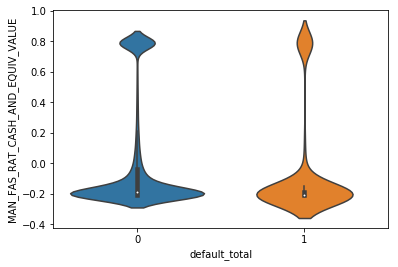

this is numerical
count    6.922800e+04
mean    -8.956415e-15
std      3.618823e-01
min     -2.113913e-01
25%     -2.092139e-01
50%     -1.888050e-01
75%     -4.518553e-02
max      7.886087e-01
Name: MI_KNID_FAS_ASS_TOT_CASH_AND_EQU, dtype: float64


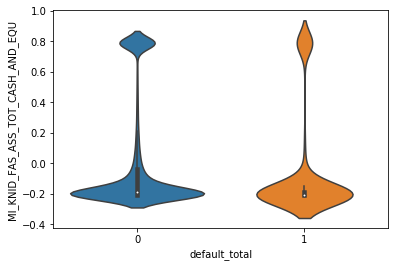

this is numerical
count    6.922800e+04
mean     2.618813e-14
std      2.270752e-01
min     -4.485381e-01
25%     -1.316554e-01
50%     -3.041962e-02
75%      1.495557e-01
max      5.514619e-01
Name: MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB, dtype: float64


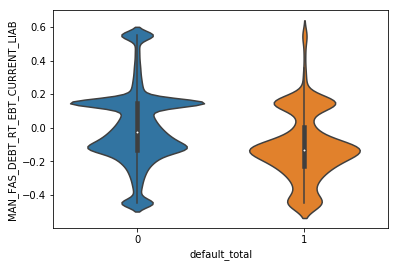

this is numerical
count    6.922800e+04
mean     1.188691e-14
std      2.325488e-01
min     -4.026492e-01
25%     -2.243246e-01
50%      1.840876e-02
75%      8.692769e-02
max      5.973508e-01
Name: MAN_KNID_FAS_RAT_SOLVENCY_EXCL_I, dtype: float64


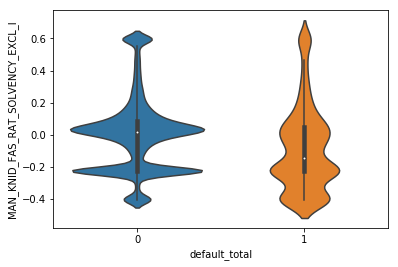

this is numerical
count    6.922800e+04
mean     1.019568e-14
std      2.040167e-01
min     -4.989066e-01
25%     -4.179156e-02
50%      3.953265e-03
75%      3.404151e-02
max      5.010934e-01
Name: MAN_FAS_PROF_RT_CASH_FLOW_EQUITY, dtype: float64


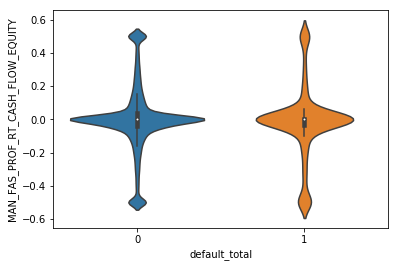

this is numerical
count    6.922800e+04
mean    -1.072500e-15
std      2.539525e-01
min     -4.721616e-01
25%     -1.973406e-01
50%      2.977946e-03
75%      1.444413e-01
max      5.278384e-01
Name: MAN_FAS_PROF_RT_EBT_TOT_ASSETS_1, dtype: float64


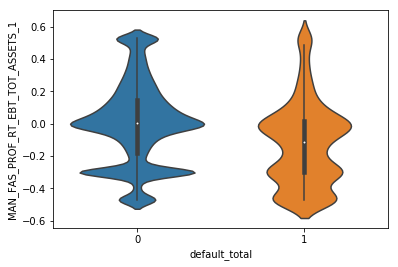

this is numerical
count    6.922800e+04
mean     2.875319e-14
std      3.319348e-01
min     -2.994784e-01
25%     -1.889224e-01
50%     -1.607622e-01
75%      5.027416e-04
max      7.005216e-01
Name: MI_KNID_FAS_PNL_EBT_VALUE_1, dtype: float64


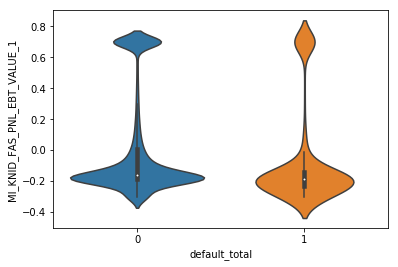

this is numerical
count    6.922800e+04
mean     4.093275e-14
std      2.955133e-01
min     -2.526923e-01
25%     -2.526923e-01
50%     -1.121010e-01
75%      1.376923e-01
max      7.473077e-01
Name: MI_KNID_FAS_RAT_BANK_DEBT_TO_ASS, dtype: float64


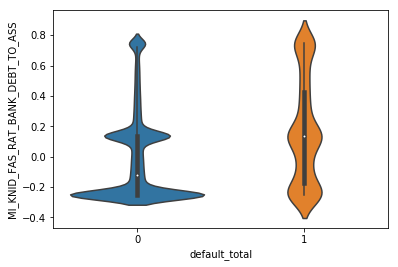

this is numerical
count    6.922800e+04
mean     6.152852e-14
std      3.409013e-01
min     -4.308888e-01
25%     -2.252336e-01
50%     -1.693371e-01
75%      2.820872e-01
max      5.691112e-01
Name: MI_KNID_FAS_PNL_NET_INCOME_VALUE, dtype: float64


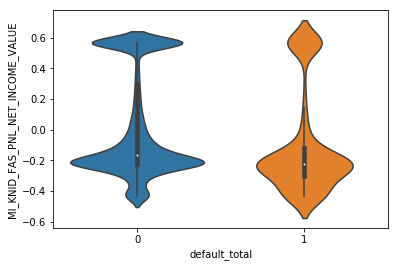

this is numerical
count    6.922800e+04
mean    -2.757167e-16
std      2.231919e-01
min     -4.162914e-01
25%     -1.440331e-01
50%     -7.999724e-03
75%      8.041734e-02
max      5.837086e-01
Name: MAN_KNID_FAS_RAT_SOLVENCY_DELTA_, dtype: float64


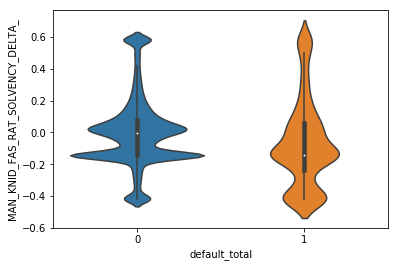

this is numerical
count    6.922800e+04
mean     3.152717e-14
std      2.205317e-01
min     -4.079562e-01
25%     -1.238846e-01
50%     -6.035354e-02
75%      1.457534e-01
max      5.920438e-01
Name: MAN_KNID_FAS_LIA_RESERVES_Avg_3Y, dtype: float64


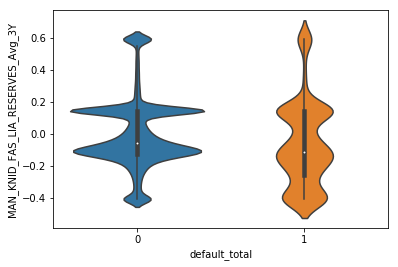

this is numerical
count    6.922800e+04
mean     5.375674e-14
std      2.934156e-01
min     -3.466134e-01
25%     -2.420091e-01
50%     -1.022896e-01
75%      3.565122e-01
max      6.533866e-01
Name: MAN_FAS_GEAR_RT_CURRENT_ASSETS_L, dtype: float64


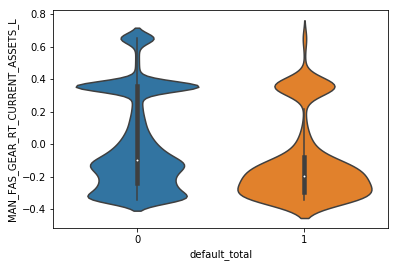

this is numerical
count    6.922800e+04
mean    -1.511301e-15
std      2.656619e-01
min     -3.068926e-01
25%     -1.957814e-01
50%     -1.055037e-01
75%      2.682818e-01
max      6.931074e-01
Name: MAN_KNID_FAS_RAT_CURRENT_VALUE_1, dtype: float64


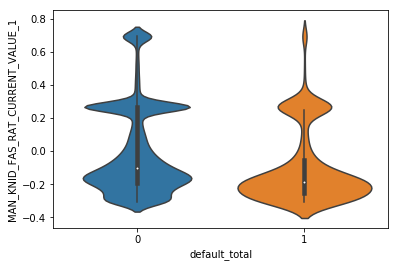

this is numerical
count    6.922800e+04
mean     3.124474e-15
std      3.650266e-01
min     -3.024907e-01
25%     -2.190447e-01
50%     -1.952707e-01
75%      2.328863e-02
max      6.975093e-01
Name: MAN_FAS_RAT_NET_CURRENT_ASSETS_V, dtype: float64


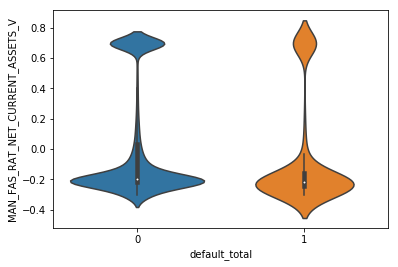

this is numerical
count    6.922800e+04
mean     6.047308e-15
std      3.792183e-01
min     -2.911839e-01
25%     -2.454107e-01
50%     -2.102893e-01
75%      6.044777e-02
max      7.088161e-01
Name: MI_KNID_FAS_CSH_GROSS_CASH_FLOW_, dtype: float64


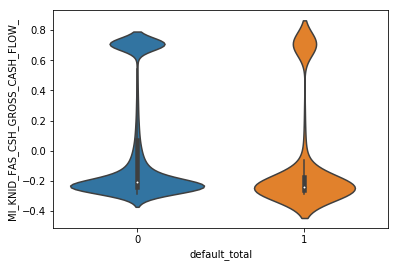

this is numerical
count    6.922800e+04
mean    -2.285691e-14
std      4.105892e-01
min     -2.510879e-01
25%     -2.510879e-01
50%     -2.510879e-01
75%      1.051795e-01
max      7.489121e-01
Name: MI_KNID_FAS_MOV_DIVIDEND_PAID_VA, dtype: float64


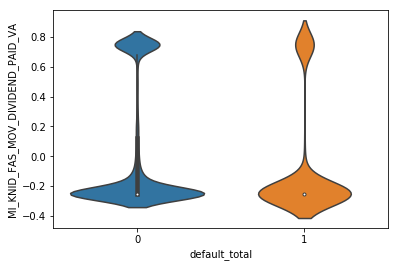

this is numerical
count    6.922800e+04
mean    -2.071293e-13
std      4.957618e-01
min     -4.518401e-01
25%     -4.512315e-01
50%     -4.476461e-01
75%      5.481599e-01
max      5.481599e-01
Name: MAN_FAS_LEVERAGE_NIBD_EBIT, dtype: float64


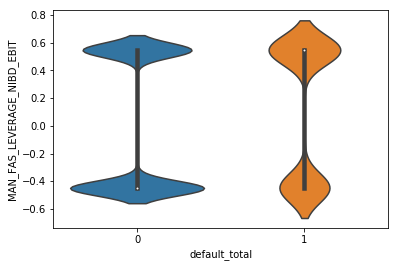

this is numerical
count    6.922800e+04
mean    -1.107851e-14
std      1.942503e-01
min     -5.066905e-01
25%     -1.135353e-02
50%     -5.732229e-03
75%      2.139930e-02
max      4.933095e-01
Name: MAN_KNID_FAS_RT_FCF_NET_INCOME_V, dtype: float64


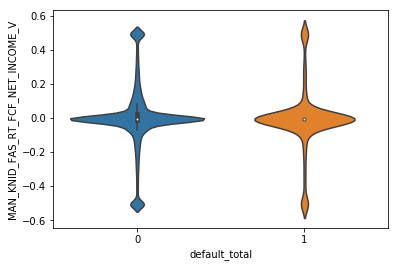

this is numerical
count    6.922800e+04
mean    -7.304781e-14
std      3.560585e-01
min     -1.843809e-01
25%     -1.843809e-01
50%     -1.778320e-01
75%     -9.187476e-02
max      8.156191e-01
Name: MI_KNID_FAS_RAT_BANK_DEBT_VALUE_, dtype: float64


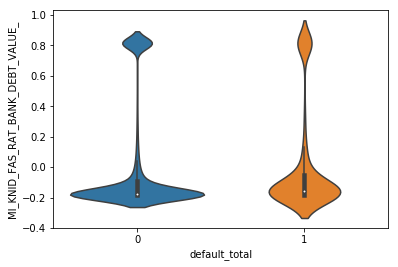

this is numerical
count    6.922800e+04
mean     6.163678e-14
std      3.918447e-01
min     -2.214347e-01
25%     -2.214347e-01
50%     -2.214347e-01
75%     -8.080398e-02
max      7.785653e-01
Name: MI_KNID_FAS_LIA_BANK_DEBT_ST_VAL, dtype: float64


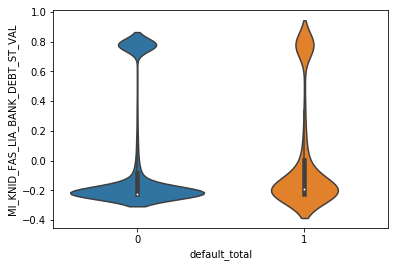

this is numerical
count    6.922800e+04
mean     8.886626e-14
std      3.610308e-01
min     -6.829329e-01
25%     -3.670940e-02
50%      1.931276e-01
75%      2.245047e-01
max      3.170671e-01
Name: MI_KNID_FAS_PNL_NET_INTEREST_INC, dtype: float64


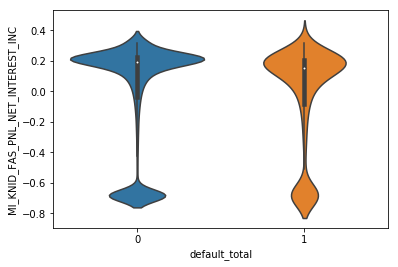

this is numerical
count    6.922800e+04
mean    -8.387601e-15
std      3.361898e-01
min     -7.627282e-01
25%     -3.010799e-01
50%      2.372718e-01
75%      2.372718e-01
max      2.372718e-01
Name: MAN_KNID_FAS_RAT_BANK_DEBT_TO_AS, dtype: float64


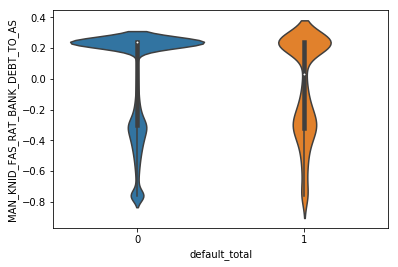

this is numerical
count    6.922800e+04
mean    -1.833933e-13
std      3.494882e-01
min     -3.491564e-01
25%     -3.090623e-01
50%     -1.961485e-01
75%      4.182470e-01
max      6.508436e-01
Name: MAN_KNID_FAS_RAT_SOLVENCY_STDEV_, dtype: float64


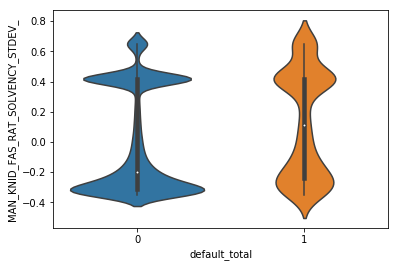

this is numerical
count    6.922800e+04
mean     2.716936e-15
std      2.209522e-01
min     -4.277393e-01
25%     -1.115821e-01
50%     -3.271556e-02
75%      1.235228e-01
max      5.722607e-01
Name: MAN_KNID_FAS_LIA_RESERVES_DELTA_, dtype: float64


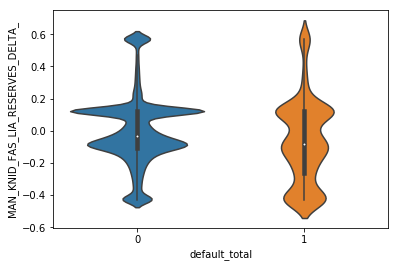

this is numerical
count    6.922800e+04
mean    -6.150632e-14
std      2.912027e-01
min     -2.819725e-01
25%     -2.651262e-01
50%     -1.312918e-01
75%      2.562544e-01
max      7.180275e-01
Name: MAN_FAS_RT_DEBT_TO_EQUITY_ADJ_SU, dtype: float64


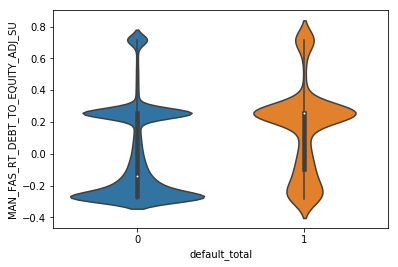

this is numerical
count    6.922800e+04
mean     3.823220e-14
std      2.793480e-01
min     -2.630076e-01
25%     -2.020977e-01
50%     -2.020977e-01
75%      1.476534e-01
max      7.369924e-01
Name: MAN_FAS_PROF_RT_EBT_TURNOVER_1, dtype: float64


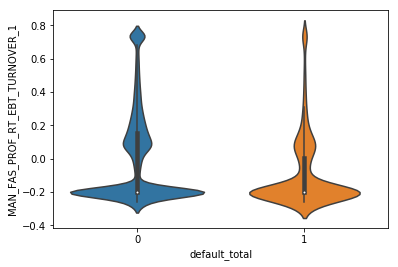

this is numerical
count    6.922800e+04
mean     8.270151e-14
std      4.157685e-01
min     -4.644115e-01
25%     -3.523281e-01
50%     -2.372912e-01
75%      5.355885e-01
max      5.355885e-01
Name: MAN_KNID_FAS_ASS_TOT_CASH_AND_EQ, dtype: float64


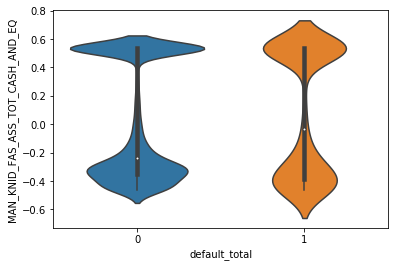

this is numerical
count    6.922800e+04
mean    -6.737344e-14
std      3.898363e-01
min     -2.259668e-01
25%     -2.188201e-01
50%     -2.116733e-01
75%     -9.695046e-02
max      7.740332e-01
Name: MI_KNID_FAS_CSH_TAXES_PAID_VALUE, dtype: float64


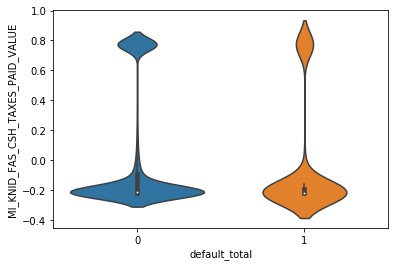

this is numerical
count    6.922800e+04
mean     4.133698e-14
std      3.762690e-01
min     -4.621303e-01
25%     -3.360174e-01
50%     -2.025254e-01
75%      4.307555e-01
max      5.378697e-01
Name: MAN_KNID_FAS_CSH_CASH_AND_EQUIV_, dtype: float64


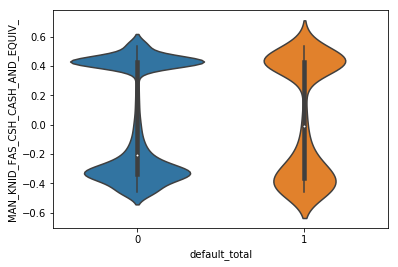

this is numerical
count    6.922800e+04
mean     3.560320e-14
std      2.258464e-01
min     -4.434417e-01
25%     -1.542280e-01
50%      9.935585e-02
75%      9.935585e-02
max      5.565583e-01
Name: MAN_FAS_EARNINGS_QUALITY_1, dtype: float64


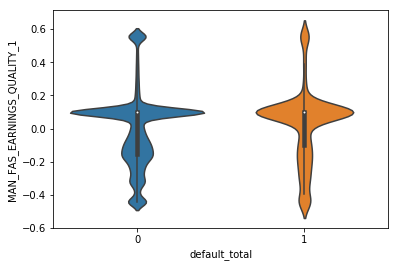

this is catagorigal
1.0    46216
0.0    23012
Name: MAN_FAS_Positive_EBITDA_EBIT_EBT, dtype: int64


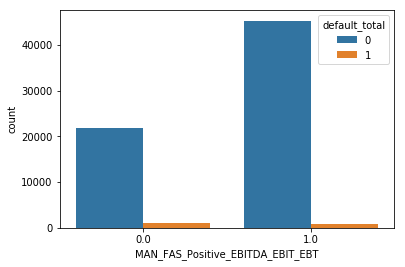

this is numerical
count    6.922800e+04
mean     4.810473e-16
std      2.083446e-01
min     -4.927272e-01
25%     -6.967992e-02
50%     -2.320752e-02
75%      6.464330e-02
max      5.072728e-01
Name: MI_KNID_FAS_RAT_RETURN_ON_EQT_VA, dtype: float64


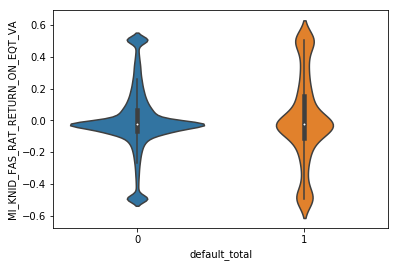

this is numerical
count    6.922800e+04
mean     1.170188e-13
std      4.485562e-01
min     -7.209077e-01
25%     -7.209077e-01
50%      2.790923e-01
75%      2.790923e-01
max      2.790923e-01
Name: MAN_FAS_CSH_GENERATING_POWER_1, dtype: float64


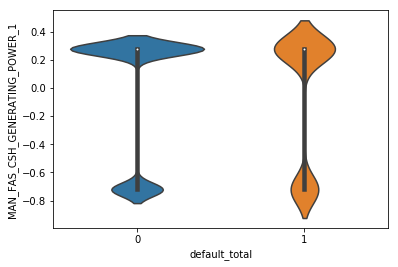

this is numerical
count    6.922800e+04
mean    -3.309045e-14
std      2.205374e-01
min     -4.674545e-01
25%     -1.165359e-01
50%     -7.323766e-03
75%      1.199736e-01
max      5.325455e-01
Name: MAN_KNID_FAS_MOV_EQT_AT_BEGIN_DE, dtype: float64


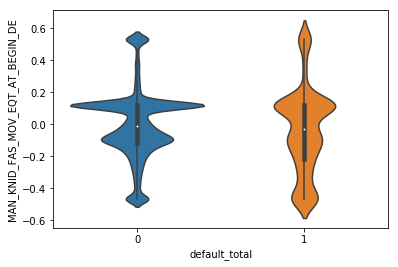

this is numerical
count    6.922800e+04
mean     4.145816e-13
std      3.015592e-01
min     -4.449125e-01
25%     -3.330737e-01
50%      2.086800e-01
75%      2.086800e-01
max      5.550875e-01
Name: MAN_KNID_FAS_CSH_TAXES_PAID_STDE, dtype: float64


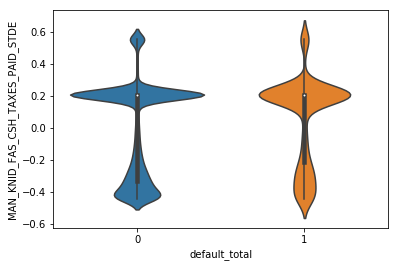

this is numerical
count    6.922800e+04
mean     2.788910e-15
std      3.398700e-01
min     -3.998164e-01
25%     -3.607510e-01
50%     -2.140969e-02
75%      3.067081e-01
max      6.001836e-01
Name: MAN_KNID_FAS_RAT_INT_BEAR_DEBT_N, dtype: float64


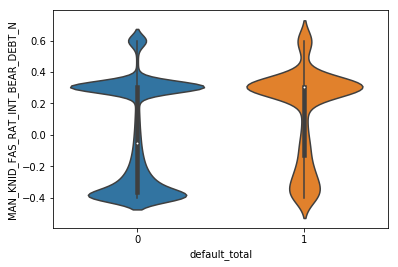

this is numerical
count    6.922800e+04
mean    -7.751608e-13
std      4.007081e-01
min     -7.072661e-01
25%     -4.519458e-01
50%      2.927339e-01
75%      2.927339e-01
max      2.927339e-01
Name: MAN_FAS_ACTIVITY_RT_ACC_PAYABLES, dtype: float64


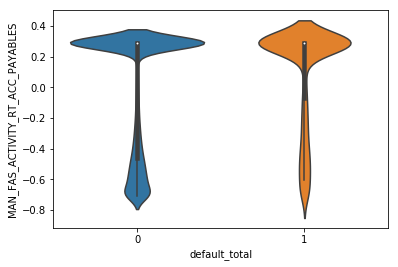

this is numerical
count    6.922800e+04
mean     1.542190e-13
std      4.231411e-01
min     -6.818207e-01
25%     -5.211128e-01
50%      3.181793e-01
75%      3.181793e-01
max      3.181793e-01
Name: MAN_KNID_FAS_RAT_BANK_DEBT_STDEV, dtype: float64


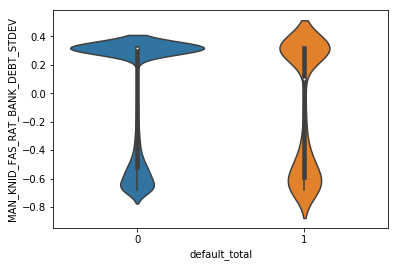

this is numerical
count    6.922800e+04
mean     1.088873e-14
std      2.165661e-01
min     -4.942996e-01
25%     -9.337659e-02
50%      4.816713e-03
75%      8.604631e-02
max      5.057004e-01
Name: MAN_FAS_DEBT_RT_CASH_FLOW_CURREN, dtype: float64


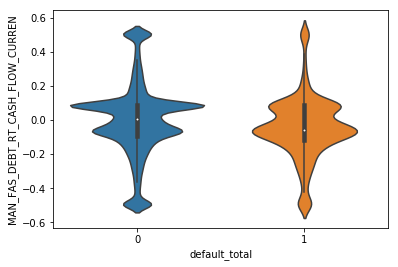

this is numerical
count    6.922800e+04
mean     6.938019e-14
std      2.351128e-01
min     -4.411356e-01
25%     -1.664930e-01
50%      2.666468e-03
75%      1.469592e-01
max      5.588644e-01
Name: MAN_KNID_FAS_CSH_GROSS_CASH_FLOW, dtype: float64


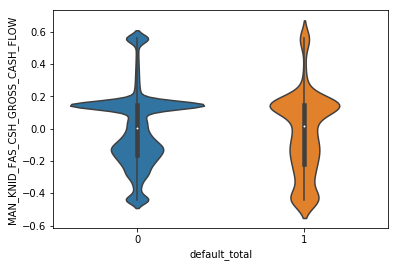

this is numerical
count    6.922800e+04
mean    -1.401638e-13
std      4.592871e-01
min     -4.727262e-01
25%     -4.485518e-01
50%     -2.565403e-01
75%      5.272738e-01
max      5.272738e-01
Name: MAN_FAS_RT_INT_BEAR_DEBT_EBITDA_, dtype: float64


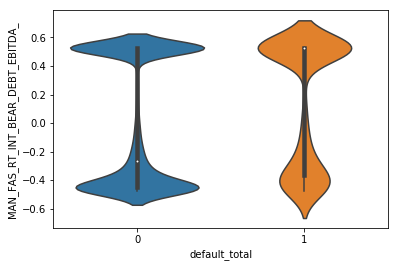

this is numerical
count    6.922800e+04
mean    -2.563387e-14
std      2.174406e-01
min     -4.371859e-01
25%     -1.247820e-01
50%      3.829471e-02
75%      7.607887e-02
max      5.628141e-01
Name: MAN_KNID_FAS_CSH_EBIT_DELTA_1, dtype: float64


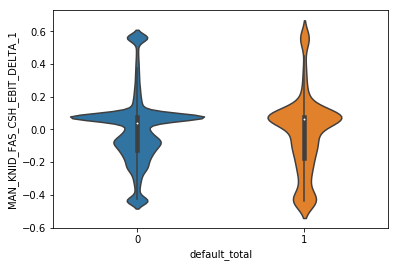

this is numerical
count    6.922800e+04
mean    -2.224130e-14
std      4.605308e-01
min     -4.157246e-01
25%     -3.771682e-01
50%     -3.514073e-01
75%      5.842754e-01
max      5.842754e-01
Name: MAN_KNID_FAS_RAT_INTEREST_Avg_3Y, dtype: float64


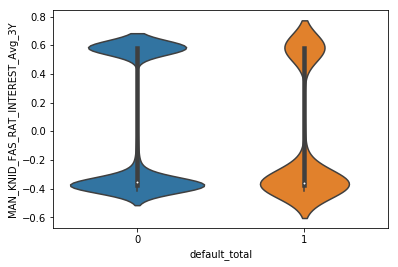

this is numerical
count    6.922800e+04
mean     8.019894e-14
std      3.906426e-01
min     -2.563197e-01
25%     -2.378311e-01
50%     -2.253100e-01
75%     -1.320013e-02
max      7.436803e-01
Name: MI_KNID_FAS_LIA_EQT_SHARE_VALUE_, dtype: float64


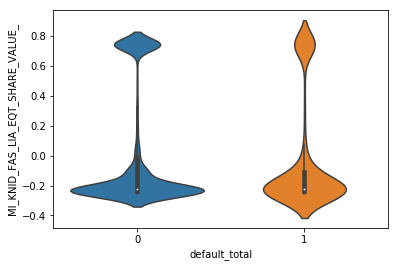

this is numerical
count    6.922800e+04
mean     4.285549e-14
std      2.662272e-01
min     -3.298277e-01
25%     -2.471176e-01
50%     -1.935987e-02
75%      1.717303e-01
max      6.701723e-01
Name: MAN_KNID_FAS_CSH_EBIT_STDEV_4Y, dtype: float64


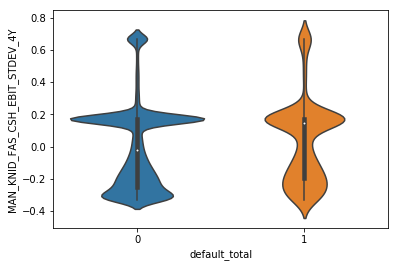

this is numerical
count    6.922800e+04
mean    -1.710040e-13
std      4.497805e-01
min     -5.822027e-01
25%     -4.964540e-01
50%      4.177973e-01
75%      4.177973e-01
max      4.177973e-01
Name: MAN_KNID_FAS_TURNOVER_AMT_Avg_3Y, dtype: float64


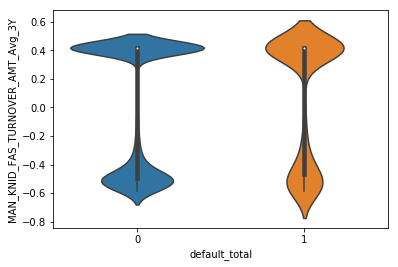

this is numerical
count    6.922800e+04
mean    -8.552824e-14
std      4.318008e-01
min     -3.630943e-01
25%     -3.593187e-01
50%     -3.517041e-01
75%      6.369057e-01
max      6.369057e-01
Name: MAN_KNID_FAS_LIA_EQT_SHARE_Avg_3, dtype: float64


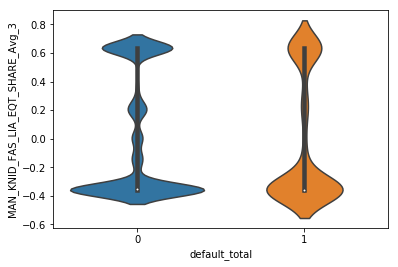

this is numerical
count    6.922800e+04
mean    -3.720745e-14
std      4.079211e-01
min     -2.639244e-01
25%     -2.639244e-01
50%     -2.482597e-01
75%      1.350424e-01
max      7.360756e-01
Name: MI_KNID_FAS_PNL_INTEREST_INCOME_, dtype: float64


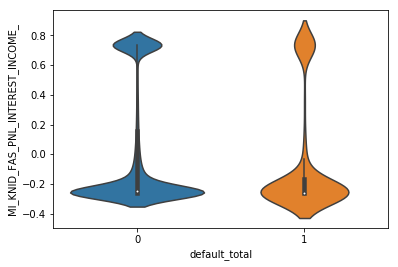

this is numerical
count    6.922800e+04
mean    -7.250432e-15
std      2.460267e-01
min     -6.136024e-01
25%     -8.625315e-02
50%     -3.167392e-02
75%      3.006329e-01
max      3.863976e-01
Name: MI_KNID_FAS_CSH_CASH_FLOW_FINANC, dtype: float64


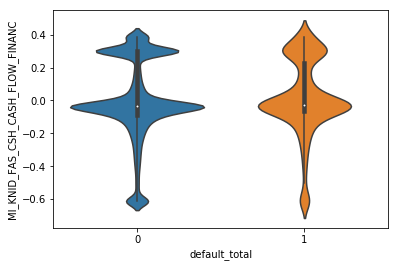

this is numerical
count    6.922800e+04
mean     3.631703e-13
std      3.816778e-01
min     -6.639675e-01
25%     -3.804271e-01
50%      3.360325e-01
75%      3.360325e-01
max      3.360325e-01
Name: MAN_KNID_FAS_TURNOVER_GROWTH_ASS, dtype: float64


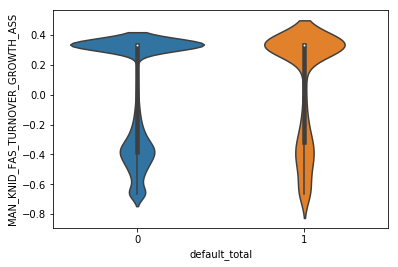

this is numerical
count    6.922800e+04
mean     2.087665e-13
std      3.191554e-01
min     -7.081142e-01
25%     -1.667004e-01
50%     -3.581162e-03
75%      2.918858e-01
max      2.918858e-01
Name: MAN_FAS_GEAR_RT_CURRENT_LIABILIT, dtype: float64


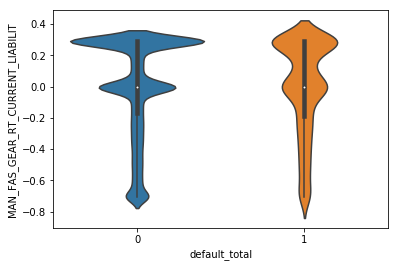

this is numerical
count    6.922800e+04
mean    -1.221511e-13
std      4.274488e-01
min     -3.645854e-01
25%     -3.374232e-01
50%     -3.040957e-01
75%      6.354146e-01
max      6.354146e-01
Name: MAN_KNID_FAS_LIA_EQT_SHARE_DELTA, dtype: float64


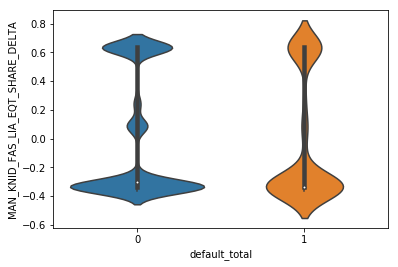

this is numerical
count    6.922800e+04
mean    -3.067041e-14
std      2.975712e-01
min     -4.025395e-01
25%     -2.435300e-01
50%     -1.420768e-01
75%      3.205644e-01
max      5.974605e-01
Name: MAN_KNID_FAS_CSH_CHANGE_CASH_AND, dtype: float64


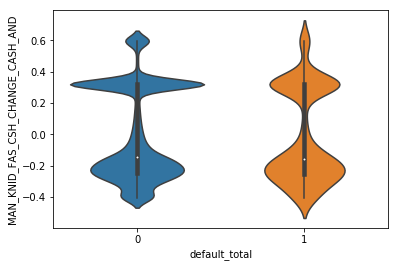

this is numerical
count    6.922800e+04
mean     2.640450e-13
std      4.351521e-01
min     -6.435013e-01
25%     -5.308408e-01
50%      3.564987e-01
75%      3.564987e-01
max      3.564987e-01
Name: MAN_KNID_FAS_PNL_INTEREST_INCOME, dtype: float64


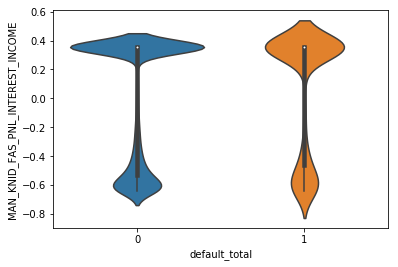

this is numerical
count    6.922800e+04
mean    -2.991612e-14
std      3.785599e-01
min     -4.145604e-01
25%     -2.679907e-01
50%     -2.001428e-01
75%      5.854396e-01
max      5.854396e-01
Name: MAN_KNID_FAS_RAT_CURRENT_DELTA_1, dtype: float64


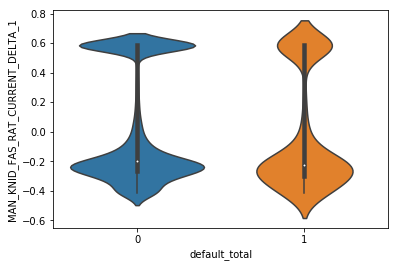

this is numerical
count    6.922800e+04
mean    -1.469695e-14
std      4.589615e-01
min     -6.160011e-01
25%     -5.577144e-01
50%      3.839989e-01
75%      3.839989e-01
max      3.839989e-01
Name: MAN_KNID_FAS_TURNOVER_AMT_STDEV_, dtype: float64


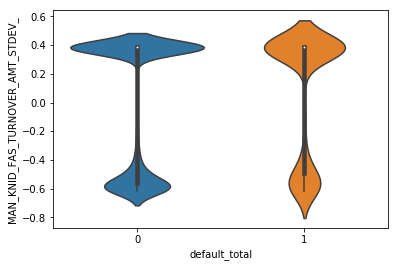

this is numerical
count    6.922800e+04
mean    -1.281827e-13
std      2.406946e-01
min     -3.796324e-01
25%     -1.622411e-01
50%      1.167191e-02
75%      9.862844e-02
max      6.203676e-01
Name: MAN_FAS_AGE_OF_FIN_STATEMENT_VAL, dtype: float64


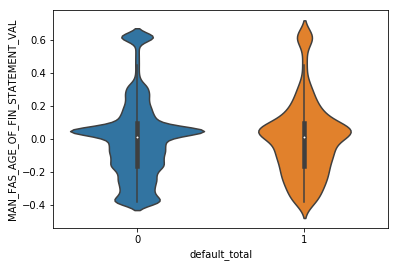

this is numerical
count    6.922800e+04
mean     1.845659e-13
std      4.852668e-01
min     -4.791400e-01
25%     -4.705254e-01
50%     -3.750674e-01
75%      5.208600e-01
max      5.208600e-01
Name: MAN_KNID_FAS_RAT_INTEREST_STDEV_, dtype: float64


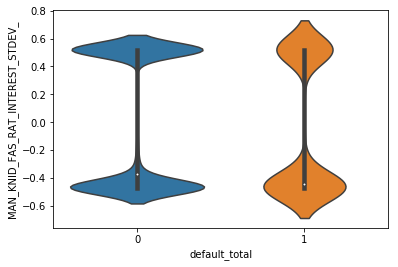

this is numerical
count    6.922800e+04
mean     6.023805e-15
std      2.846135e-01
min     -5.659365e-01
25%     -1.339082e-01
50%     -9.214316e-02
75%      2.521791e-01
max      4.340635e-01
Name: MI_KNID_FAS_CSH_CHANGE_IN_WORKIN, dtype: float64


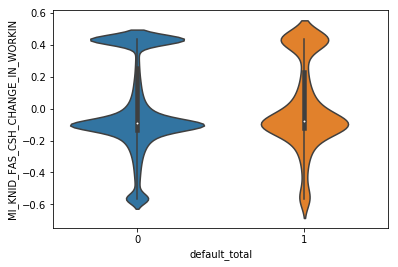

this is catagorigal
0.0    59887
1.0     9341
Name: MAN_FAS_Positive_FCF_1_2_3, dtype: int64


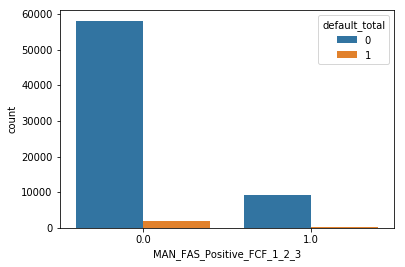

this is numerical
count    6.922800e+04
mean     1.939467e-13
std      2.386523e-01
min     -4.589811e-01
25%     -1.196464e-01
50%      5.584883e-02
75%      5.584883e-02
max      5.410189e-01
Name: MAN_FAS_ACTIVITY_RT_TURNOVER_TOT, dtype: float64


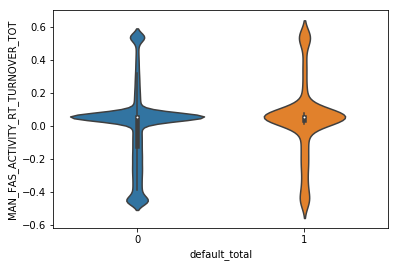

this is numerical
count    6.922800e+04
mean     1.433283e-13
std      4.460594e-01
min     -4.557559e-01
25%     -4.099925e-01
50%     -2.750181e-01
75%      5.442441e-01
max      5.442441e-01
Name: MAN_KNID_FAS_PNL_OTHER_FIXED_COS, dtype: float64


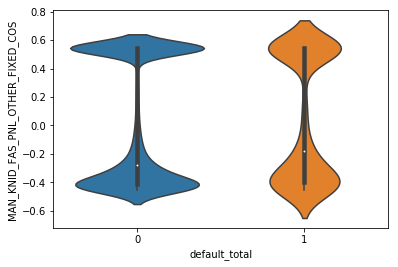

this is numerical
count    6.922800e+04
mean     1.527585e-13
std      3.489585e-01
min     -5.142785e-01
25%     -3.775226e-01
50%      1.558945e-01
75%      3.274353e-01
max      4.857215e-01
Name: MAN_KNID_FAS_CSH_CASH_FLOW_INV_A, dtype: float64


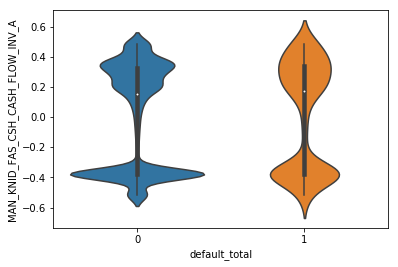

this is numerical
count    6.922800e+04
mean    -3.493982e-14
std      3.327652e-01
min     -3.740159e-01
25%     -2.536806e-01
50%     -1.672111e-01
75%      4.691915e-01
max      6.259841e-01
Name: MAN_KNID_FAS_RAT_ACCOUNT_PAYABLE, dtype: float64


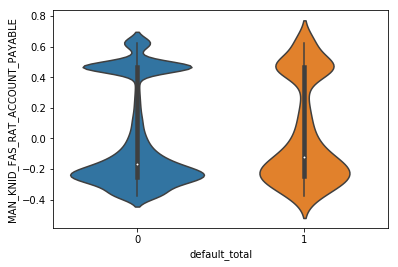

this is numerical
count    6.922800e+04
mean     4.728514e-15
std      3.596145e-01
min     -1.650171e-01
25%     -1.650171e-01
50%     -1.650171e-01
75%     -1.572369e-01
max      8.349829e-01
Name: MI_KNID_FAS_RAT_GOODWILL_VALUE_1, dtype: float64


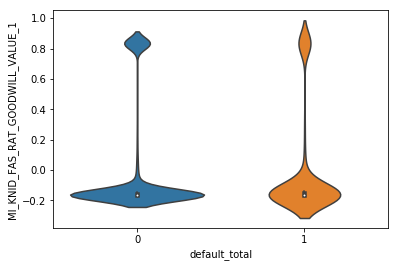

this is numerical
count    6.922800e+04
mean     2.071665e-14
std      3.960606e-01
min     -2.725534e-01
25%     -2.725534e-01
50%     -2.725534e-01
75%      5.014602e-01
max      7.274466e-01
Name: MI_KNID_FAS_RAT_INVENTORY_TURNOV, dtype: float64


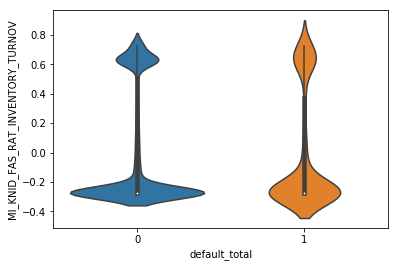

this is numerical
count    6.922800e+04
mean    -1.146425e-13
std      4.642772e-01
min     -5.881372e-01
25%     -5.881372e-01
50%      4.118628e-01
75%      4.118628e-01
max      4.118628e-01
Name: MAN_FAS_ACTIVITY_RT_INVENTORY_TU, dtype: float64


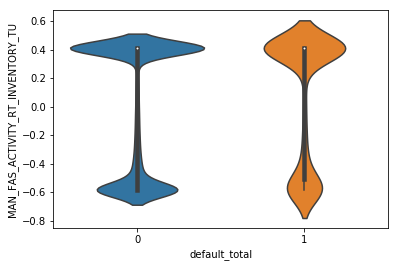

this is numerical
count    6.922800e+04
mean    -1.511301e-15
std      2.656619e-01
min     -3.068926e-01
25%     -1.957814e-01
50%     -1.055037e-01
75%      2.682818e-01
max      6.931074e-01
Name: MI_KNID_FAS_RAT_CURRENT_VALUE_1, dtype: float64


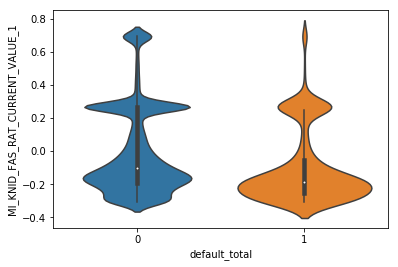

this is catagorigal
1    65395
2     2817
3     1016
Name: MAN_LE_LPS_FAS, dtype: int64


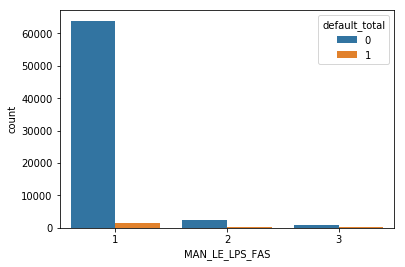

this is numerical
count    6.922800e+04
mean     7.474004e-14
std      3.666763e-01
min     -6.665860e-01
25%     -1.121747e-01
50%      2.089182e-01
75%      2.259944e-01
max      3.334140e-01
Name: MI_KNID_FAS_CSH_CASH_FLOW_INV_AC, dtype: float64


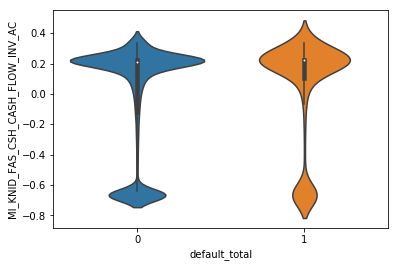

this is numerical
count    6.922800e+04
mean     4.849127e-14
std      3.535138e-01
min     -2.153799e-01
25%     -2.045950e-01
50%     -1.752992e-01
75%     -4.427216e-02
max      7.846201e-01
Name: MI_KNID_FAS_ASS_TOT_ASSETS_VALUE, dtype: float64


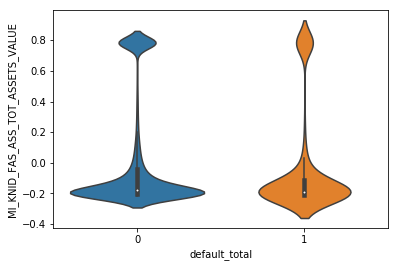

this is numerical
count    6.922800e+04
mean    -1.432655e-14
std      3.584811e-01
min     -1.642809e-01
25%     -1.642809e-01
50%     -1.642809e-01
75%     -1.528588e-01
max      8.357191e-01
Name: MI_KNID_FAS_ASS_TOT_INTANGIBLE_A, dtype: float64


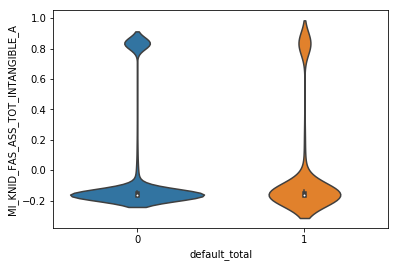

this is numerical
count    6.922800e+04
mean     6.085913e-14
std      3.909411e-01
min     -2.468883e-01
25%     -2.430560e-01
50%     -2.169887e-01
75%     -1.601442e-02
max      7.531117e-01
Name: MI_KNID_FAS_ASS_TOT_FIXED_ASSETS, dtype: float64


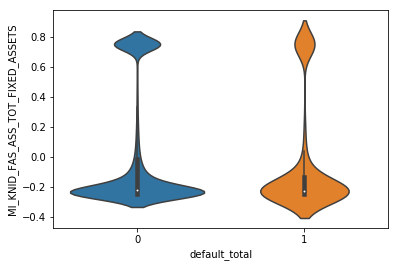

this is numerical
count    6.922800e+04
mean     1.232928e-14
std      3.857802e-01
min     -2.563750e-01
25%     -2.472172e-01
50%     -2.146356e-01
75%      2.918703e-02
max      7.436250e-01
Name: MI_KNID_FAS_ASS_TOT_CURRENT_ASSE, dtype: float64


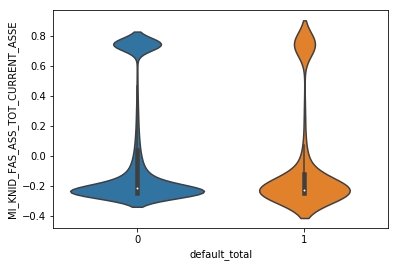

this is numerical
count    6.922800e+04
mean    -4.240215e-14
std      3.900752e-01
min     -2.259533e-01
25%     -2.259533e-01
50%     -2.146260e-01
75%     -7.665183e-02
max      7.740467e-01
Name: MI_KNID_FAS_LIA_TOT_LONG_TERM_DE, dtype: float64


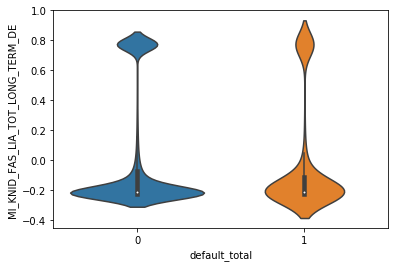

this is numerical
count    6.922800e+04
mean     4.597110e-14
std      3.872746e-01
min     -2.688118e-01
25%     -2.561204e-01
50%     -2.162431e-01
75%      6.693177e-02
max      7.311882e-01
Name: MI_KNID_FAS_LIA_TOT_SHORT_TERM_D, dtype: float64


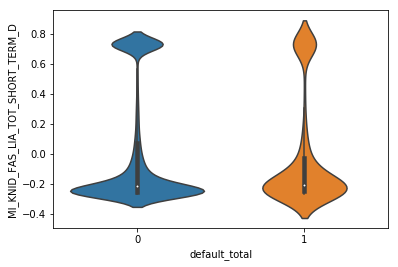

this is numerical
count    6.922800e+04
mean    -4.467774e-14
std      3.849962e-01
min     -2.537664e-01
25%     -2.422543e-01
50%     -2.090283e-01
75%     -2.533664e-03
max      7.462336e-01
Name: MI_KNID_FAS_LIA_TOT_LIAB_EQT_VAL, dtype: float64


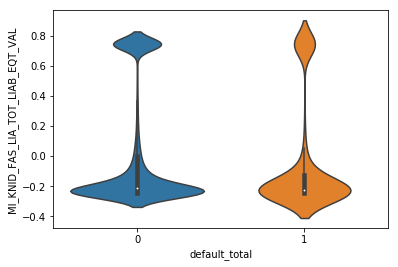

In [34]:
clean_x = clean.drop('default_total',axis=1)
colnames=clean_x.columns

for v in range(127):
  if (clean[colnames[v]].value_counts().shape[0]>14):
    print('this is numerical')
    print(clean[colnames[v]].describe())
    sns.violinplot(x='default_total',y=colnames[v],data=clean)
  else:
    print('this is catagorigal')
    print(clean[colnames[v]].value_counts())
    #sns.barplot(x='default_total',y=colnames[l[v]],data=clean)
    sns.countplot(x=colnames[v],hue='default_total',data=clean)
#sns.boxplot(x='default_total',y='MAN_FAS_Positive_EBITDA_EBIT_EBT',data=clean)

  plt.show()

# Observation from visualization

R_NEW_B_TYPE with catagory from 1 to 5 default rate is decreasing

scoredata_available decreasing from 1 to 7

flag_for_df default is more for 1 less for 2

MAN_LE_REMINDER_SEVERITY_1_COUNT 0.0 and 1.0 has higher default

MAN_LE_REMINDER_SEVERITY_2_COUNT 0.0 has more

MAN_LE_REMINDER_SEVERITY_3_COUNT  0.0 has more

MI_KIND_COUNTRY_OF_REGISTRATION more default rate decrease from 1 to 6

MAN_LE_COMBINED_REMINDER_1_12 with value close to .8 there are several defaulters

MAN_LE_MAX_REMINDER_SEVERITY_MTH ha smore default for 0.0

MAN_SCOREDATA_ALL_ACC_DISP_DE value close to .7 there are no default

MAN_LE_SCOREDATA_TRANS_ACCOD_DA value close to .8 are some defaulters

MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4 value close to .65 are less likely to default

MAN_LE_SCOREDATA_DTO_TOTAL_AVG_1 value close to .7 are less likelyto default

MAN_LE_SCOREDATA_ALL_EXPOSURE_SU value close to .3 there are a lot of default

MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT close to -.4 has a lot of default

MAN_FAS_GEAR_RT_EQUITY_LIABILITY close to -.2 has a lot of default

MAN_FAS_RAT_SOLVENCY_EXCL_INTANG value close -.4 has lot of default

MAN_FAS_GEAR_RT_CURRENT_ASSETS_L value clos eto -.3 has a lot of default

MAN_FAS_Positive_FCF_1_2_3 0.0 has more default

MAN_LE_LPS_FAS for value 1 has more default

Looks like boxplot cannot be visualize without normalizing the data. So go back and do normalize for numeric variables


# Create Model with variable importance

In [37]:
# Create Model
l=[38, 25, 14, 17, 9, 118, 37, 31, 10, 35, 13, 20, 15, 11, 33, 30, 1, 32, 34, 36]
clean_x = clean.drop('default_total',axis=1)
colnames=clean_x.columns
print(l)
print(colnames[l[0:]])

[38, 25, 14, 17, 9, 118, 37, 31, 10, 35, 13, 20, 15, 11, 33, 30, 1, 32, 34, 36]
Index(['MAN_LE_LPS_BEH', 'MAN_LE_CUSTINFRA_CUSTOMER_TIME_E',
       'MAN_LE_SCOREDATA_TRANS_ACC_OD_DA', 'MAN_LE_CUSTINFRA_INDUSTRY_CODE_E',
       'MAN_LE_COMBINED_REMINDER_1_12', 'MAN_LE_LPS_FAS',
       'MAN_LE_TREND_ODD_2500_TOTAL_0_4v', 'MAN_LE_SCOREDATA_ALL_EXPOSURE_SU',
       'MAN_LE_MAX_REMINDER_SEVERITY_MTH', 'MAN_LE_TREND_ODD_500_TOTAL_0_4vs',
       'MAN_LE_SCOREDATA_TRANS_ACC_BALAN', 'MAN_LE_SCOREDATA_DTO_TOTAL_EXU_T',
       'MAN_LE_SCOREDATA_RT_AVG_DISP_DEP', 'MAN_LE_SCOREDATA_TRANS_CARDS_UTI',
       'MAN_CP_CONFIDENTIAL_FLAG', 'MAN_LE_SCOREDATA_CTO_TOTAL_TR_1T',
       'MI_LE_SCOREDATA_TRANS_ACC_EXPOSU', 'MAN_LE_SCOREDATA_TRANS_ACC_NO_CR',
       'MAN_CP_NUMBER_OF_AUDITO', 'MAN_LE_TREND_ODD_1000_TOTAL_0_4v'],
      dtype='object')


Train test split

In [38]:
#Train test split
#X = clean.loc[:,clean.columns != 'default_total'].values  
X = clean_x.loc[:,colnames[l[1:]]].values  
y = clean.iloc[:, 5].values  

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0) 
#clean.columns

#Fit logistic regression
classifier = LogisticRegression(class_weight={0:0.1,1:.9},random_state = 0)  
classifier.fit(X_train, y_train)  

LogisticRegression(C=1.0, class_weight={0: 0.1, 1: 0.9}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Accuracy check

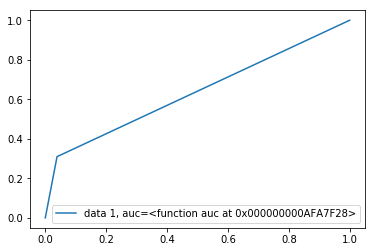

Predicted      0    1    All
True                        
0          12943  519  13462
1            265  119    384
All        13208  638  13846
F Score : 0.23287671232876714 precesion : 0.1865203761755486 Recall : 0.3098958333333333 Logloss : 1.9557139740485525 Accuracy : 0.9433771486349848


In [39]:
#accuracy check 
y_pred = classifier.predict(X_test)  
mat=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True) 
#positive is fraud, negative is not fraud 
tp=mat.iloc[1,1] 
tn=mat.iloc[0,0] 
fp=mat.iloc[0,1] 
fn=mat.iloc[1,0] 
precision=tp/(tp+fp) 
recall=tp/(tp+fn) 
fscore=2*precision*recall/(precision+recall) 

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred) 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc)) 
plt.legend(loc=4) 
plt.show()  
logloss=log_loss(y_test, y_pred) 
accuracy=(tp+tn)/(tp+tn+fp+fn)
print(mat)
print('F Score :',fscore, 'precesion :',precision,'Recall :',recall,'Logloss :',logloss,'Accuracy :',accuracy)

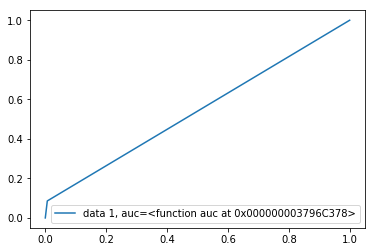

F Score : 0.13043478260869565 precesion : 0.27049180327868855 Recall : 0.0859375 Logloss : 1.0975828959939333 Accuracy : 0.9682218691318792


In [526]:
#use adaboost 
#dt = DecisionTreeClassifier()  
#try logistic with cost function and adaboost
dt= LogisticRegression(class_weight={0:0.1,1:.9},random_state = 0)

clf = AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1) 
#Above I have used decision tree as a base estimator, any ML learner as base estimator   
#100 decision tree are used as week learner 
clf.fit(X_train,y_train) 

 
#remove unwanted variables 
#del X,dataset,dataset_pred 

 
# Predicting the Test set results  
y_pred = clf.predict(X_test)  

 
mat=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True) 
#positive is fraud, negative is not fraud 
tp=mat.iloc[1,1] 
tn=mat.iloc[0,0] 
fp=mat.iloc[0,1] 
fn=mat.iloc[1,0] 
precision=tp/(tp+fp) 
recall=tp/(tp+fn) 
fscore=2*precision*recall/(precision+recall) 
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred) 
accuracy=(tp+tn)/(tp+tn+fp+fn)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc)) 
plt.legend(loc=4) 
plt.show()  
logloss=log_loss(y_test, y_pred) 
print('F Score :',fscore, 'precesion :',precision,'Recall :',recall,'Logloss :',logloss,'Accuracy :',accuracy)

Looks like model is not that good with precision only .2. Adaboost is bettre than logistic with .26 Precision score with decision tree, using logistic with cost function its increased to .27
Looks like even after adaboost with cost function model is predicting more default=0

In [527]:
print(mat)

Predicted    0.0  1.0    All
True                        
0.0        13373   89  13462
1.0          351   33    384
All        13724  122  13846


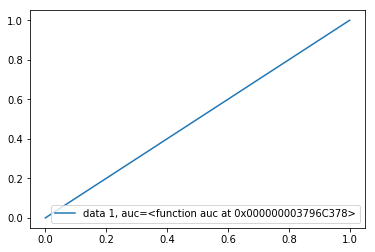

F Score : 0.05255234706445873 precesion : 0.027733641484905387 Recall : 0.5 Logloss : 0.9578860418637668 Accuracy : 0.5


In [528]:
# Try SVM
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


#dt= LogisticRegression(class_weight={0:0.1,1:.9},random_state = 0)

#clf = AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1) 
#Above I have used decision tree as a base estimator, any ML learner as base estimator   
#100 decision tree are used as week learner 
#clf.fit(X_train,y_train) 

 
#remove unwanted variables 
#del X,dataset,dataset_pred 

 
# Predicting the Test set results  
#y_pred = clf.predict(X_test)  

 
mat=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True) 
#positive is fraud, negative is not fraud 
tp=mat.iloc[1,1] 
tn=mat.iloc[0,0] 
fp=mat.iloc[0,1] 
fn=mat.iloc[1,0] 
precision=tp/(tp+fp) 
recall=tp/(tp+fn) 
fscore=2*precision*recall/(precision+recall) 
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred) 
accuracy=(tp+tn)/(tp+tn+fp+fn)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc)) 
plt.legend(loc=4) 
plt.show()  
logloss=log_loss(y_test, y_pred) 
print(mat)
print('F Score :',fscore, 'precesion :',precision,'Recall :',recall,'Logloss :',logloss,'Accuracy :',accuracy)

In [529]:
print(mat)

Predicted    0.0    All
True                   
0.0        13462  13462
1.0          384    384
All        13846  13846


Well the presision is not that good because the problem statement itself is complex to predict. But As adaboost with cost function is quite better this model is choosen

# Create model with important variables from visualization


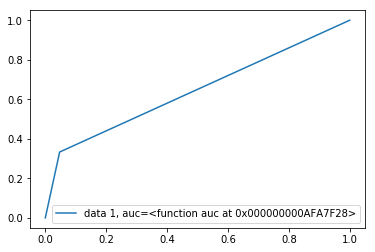

Predicted      0    1    All
True                        
0          12827  635  13462
1            256  128    384
All        13083  763  13846
F Score : 0.22319093286835223 precesion : 0.16775884665792923 Recall : 0.3333333333333333 Logloss : 2.222631627346064 Accuracy : 0.9356492849920555


In [31]:
#Lets try the variables which looks related from visualization
X = clean[['R_NEW_B_TYPE','scoredata_available','flag_for_df','MAN_LE_REMINDER_SEVERITY_1_COUNT','MAN_LE_REMINDER_SEVERITY_2_COUNT','MAN_LE_REMINDER_SEVERITY_3_COUNT','MAN_LE_COMBINED_REMINDER_1_12','MAN_LE_MAX_REMINDER_SEVERITY_MTH','MAN_LE_SCOREDATA_DTO_TOTAL_AVG_4','MAN_LE_SCOREDATA_DTO_TOTAL_AVG_1','MAN_LE_SCOREDATA_ALL_EXPOSURE_SU','MAN_FAS_ASS_RT_SOLVENCY_BY_EQUIT','MAN_FAS_GEAR_RT_EQUITY_LIABILITY','MAN_FAS_RAT_SOLVENCY_EXCL_INTANG','MAN_FAS_GEAR_RT_CURRENT_ASSETS_L','MAN_FAS_Positive_FCF_1_2_3','MAN_LE_LPS_FAS','MI_LE_SCOREDATA_TRANS_ACC_EXPOSU','MAN_LE_SCOREDATA_TRANS_ACC_BALAN','MAN_CF_FROM_OPS_TO_AVG_12M_CTO_P','MAN_LE_SCOREDATA_CTO_TOTAL_AVG_1','MAN_LE_SCOREDATA_CTO_TOTAL_AVG_4','MAN_LE_SCOREDATA_DTO_TOTAL_AVG_E','MAN_LE_SCOREDATA_DTO_TOTAL_AVG_8','MAN_LE_SCOREDATA_CTO_TOTAL_AVG_8','MAN_LE_SCOREDATA_CTO_TOTAL_AVG_E','MAN_LE_TREND_ODD_500_TOTAL_0_4vs','MAN_LE_TREND_ODD_2500_TOTAL_0_4v','MAN_FAS_GEAR_RT_EQUITY_CURRENT_L','MAN_FAS_SOLVENCY_RATIO','MAN_FAS_DEBT_RT_EBT_INTEREST_EXP','MAN_FAS_DEBT_RT_EBT_LIABILITY_1','MAN_FAS_DEBT_RT_EBT_CURRENT_LIAB','MAN_KNID_FAS_RAT_CURRENT_VALUE_1','MAN_KNID_FAS_LIA_EQT_SHARE_DELTA','MI_KNID_FAS_RAT_CURRENT_VALUE_1','MAN_LE_SCOREDATA_ALL_ACC_DISP_DE','MAN_LE_SCOREDATA_TRANS_ACC_OD_DA','MI_KNID_COUNTRY_OF_REGISTRATION']].values  
y = clean.iloc[:, 5].values  

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0) 
#clean.columns

#Fit logistic regression
classifier = LogisticRegression(class_weight={0:0.1,1:.9},random_state = 0)  
classifier.fit(X_train, y_train)  

y_pred = classifier.predict(X_test)  
mat=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True) 
#positive is fraud, negative is not fraud 
tp=mat.iloc[1,1] 
tn=mat.iloc[0,0] 
fp=mat.iloc[0,1] 
fn=mat.iloc[1,0] 
precision=tp/(tp+fp) 
recall=tp/(tp+fn) 
fscore=2*precision*recall/(precision+recall) 

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred) 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc)) 
plt.legend(loc=4) 
plt.show()  
logloss=log_loss(y_test, y_pred) 
accuracy=(tp+tn)/(tp+tn+fp+fn)
print(mat)
print('F Score :',fscore, 'precesion :',precision,'Recall :',recall,'Logloss :',logloss,'Accuracy :',accuracy)


In [32]:
#check training score
y_pred1 = classifier.predict(X_train)  
mat=pd.crosstab(y_train, y_pred1, rownames=['True'], colnames=['Predicted'], margins=True) 
#positive is fraud, negative is not fraud 
tp=mat.iloc[1,1] 
tn=mat.iloc[0,0] 
fp=mat.iloc[0,1] 
fn=mat.iloc[1,0] 
precision=tp/(tp+fp) 
recall=tp/(tp+fn) 
fscore=2*precision*recall/(precision+recall) 

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred) 
#plt.plot(fpr,tpr,label="data 1, auc="+str(auc)) 
#plt.legend(loc=4) 
#plt.show()  
#logloss=log_loss(y_test, y_pred) 
accuracy=(tp+tn)/(tp+tn+fp+fn)
print(mat)


Predicted      0     1    All
True                         
0          51294  2485  53779
1           1039   564   1603
All        52333  3049  55382


#So last model is best compare to others as recall value is more